In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans  # Import KMeans class for clustering
from sklearn.preprocessing import StandardScaler
import json

In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv('walmart.csv')

In [3]:
# Print all variables (columns) in the dataset
print(data.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
# Convert 'Date' column to datetime type with explicit date format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [6]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [7]:
# Group the data based on the 'Store' column
grouped_data = data.groupby('Store')

In [8]:
grouped_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6292     45 2010-02-05     890689.51             0        27.31       2.784   
6293     45 2010-02-12     656988.64             1        27.73       2.773   
6294     45 2010-02-19     841264.04             0        31.27       2.745   
6295     45 2010-02-26     741891.65             0        34.89       2.754   
6296     45 2010-03-05     777951.22             0        37.13       2.777   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6292  181.871190         8.992  
6293  181.982317         8.992  
6294  182.034782         8.992  
6295  182.077469         8.992  
6296  182.120157         8.992  

[225 rows x 8 columns]

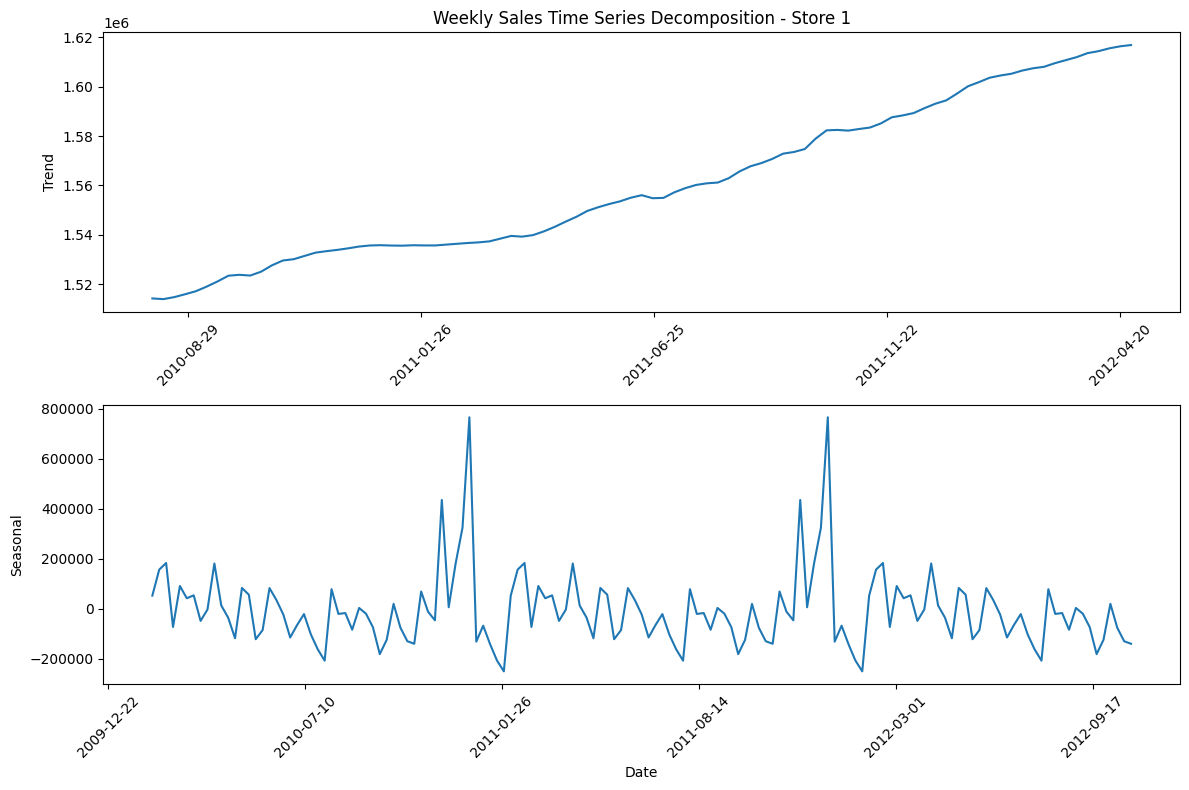

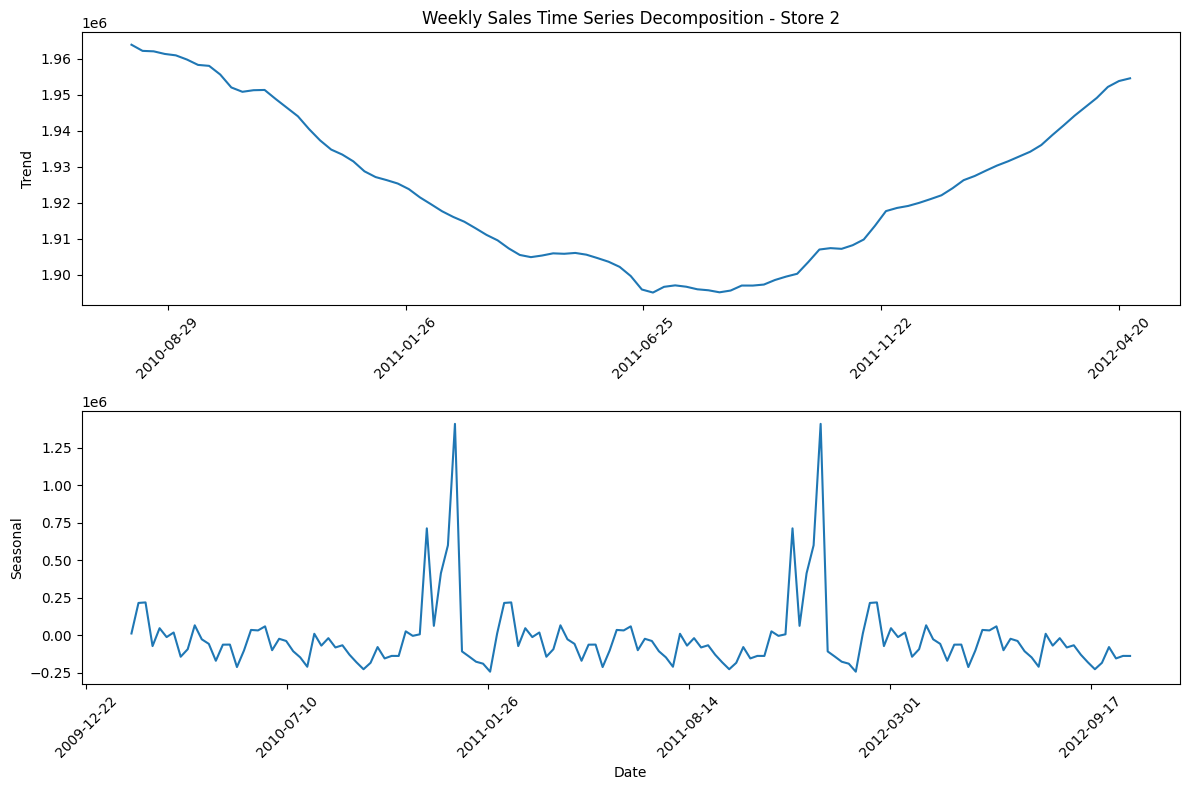

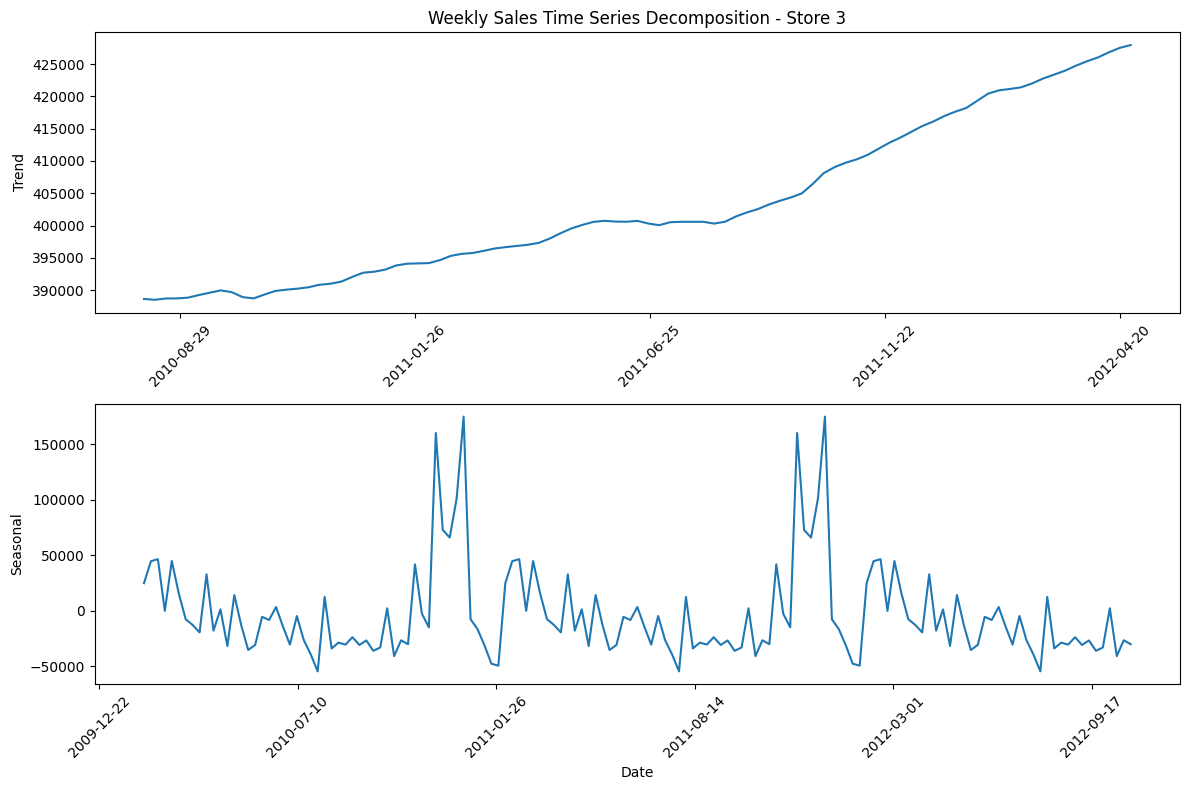

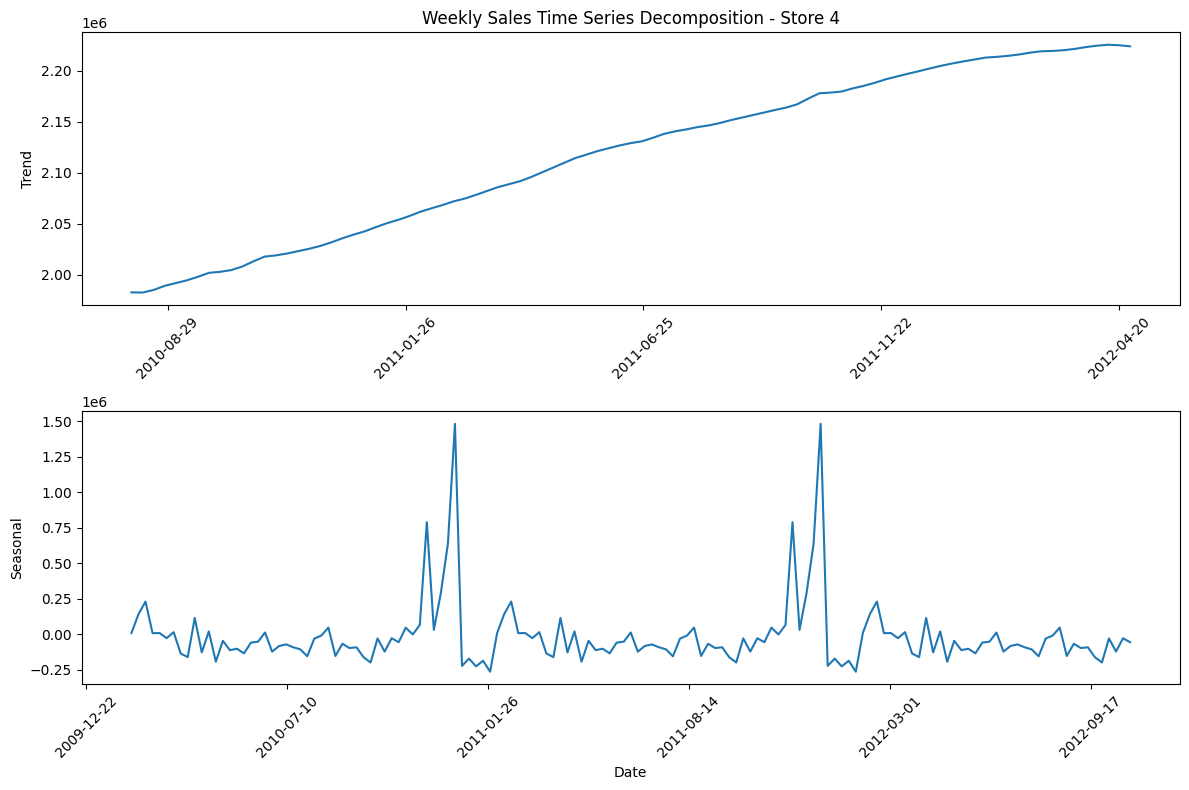

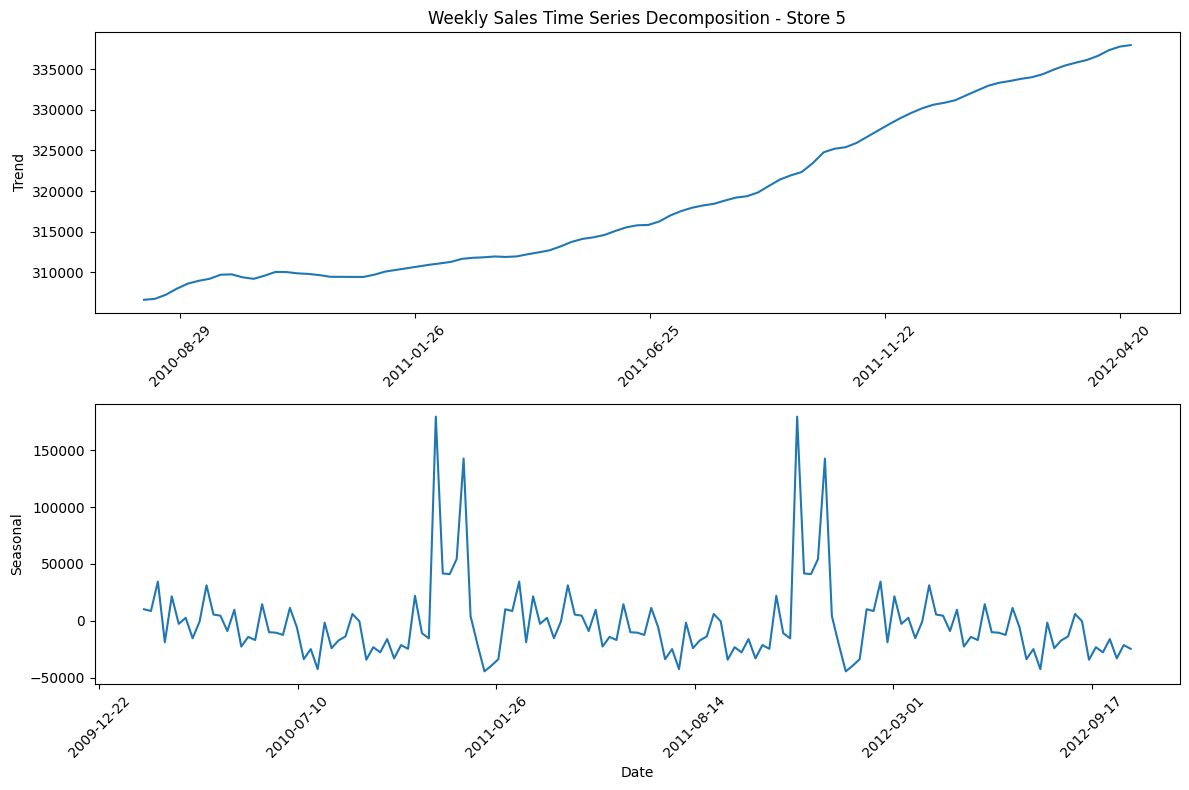

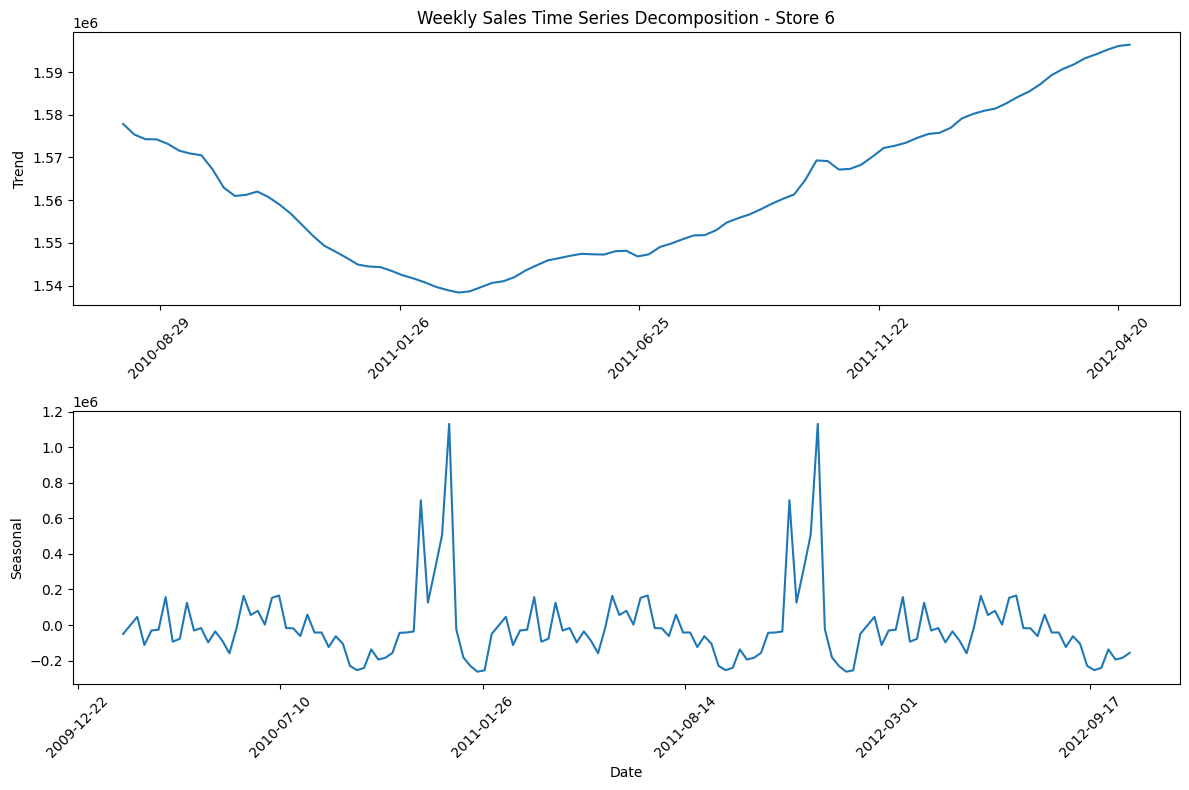

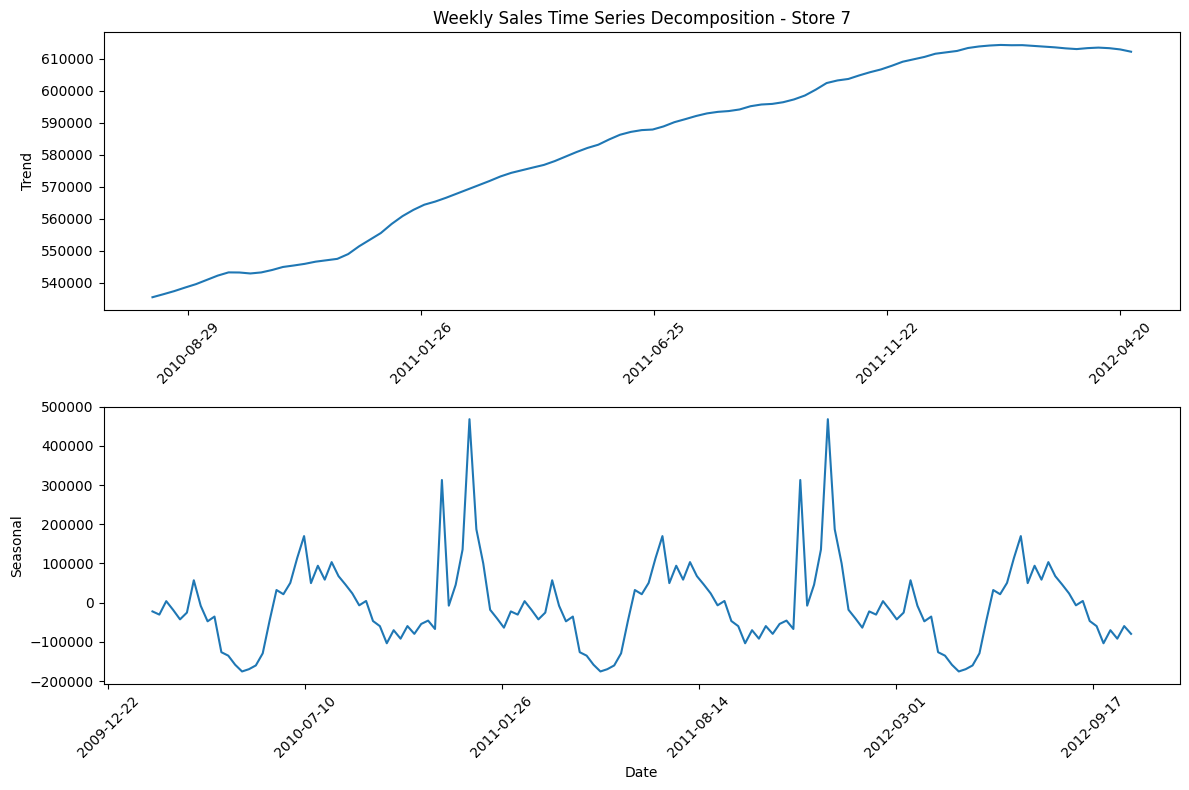

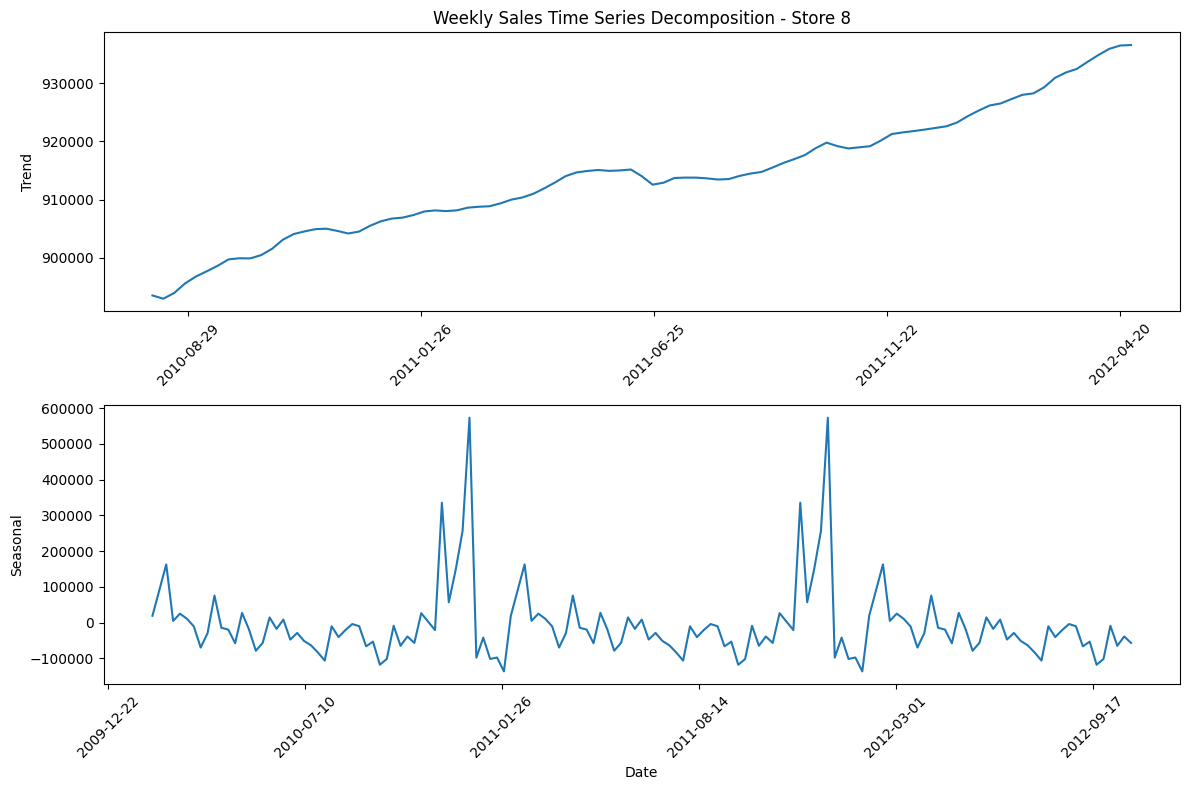

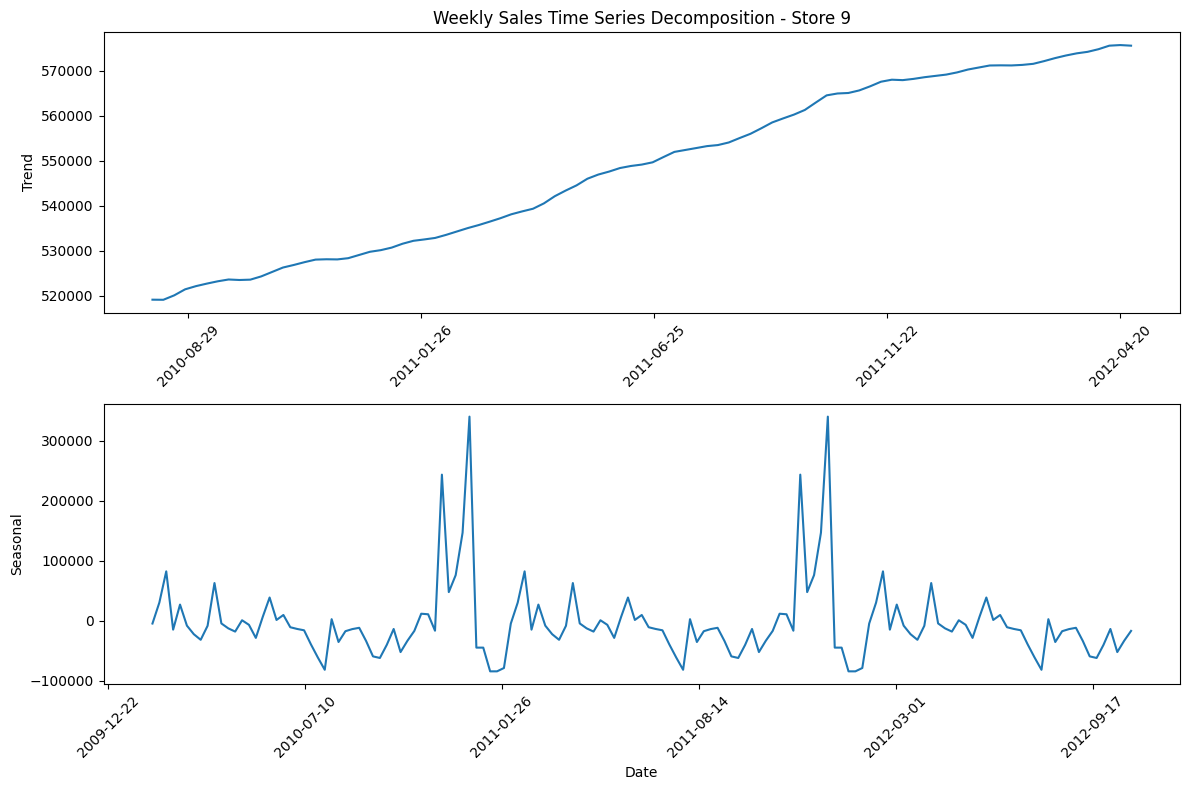

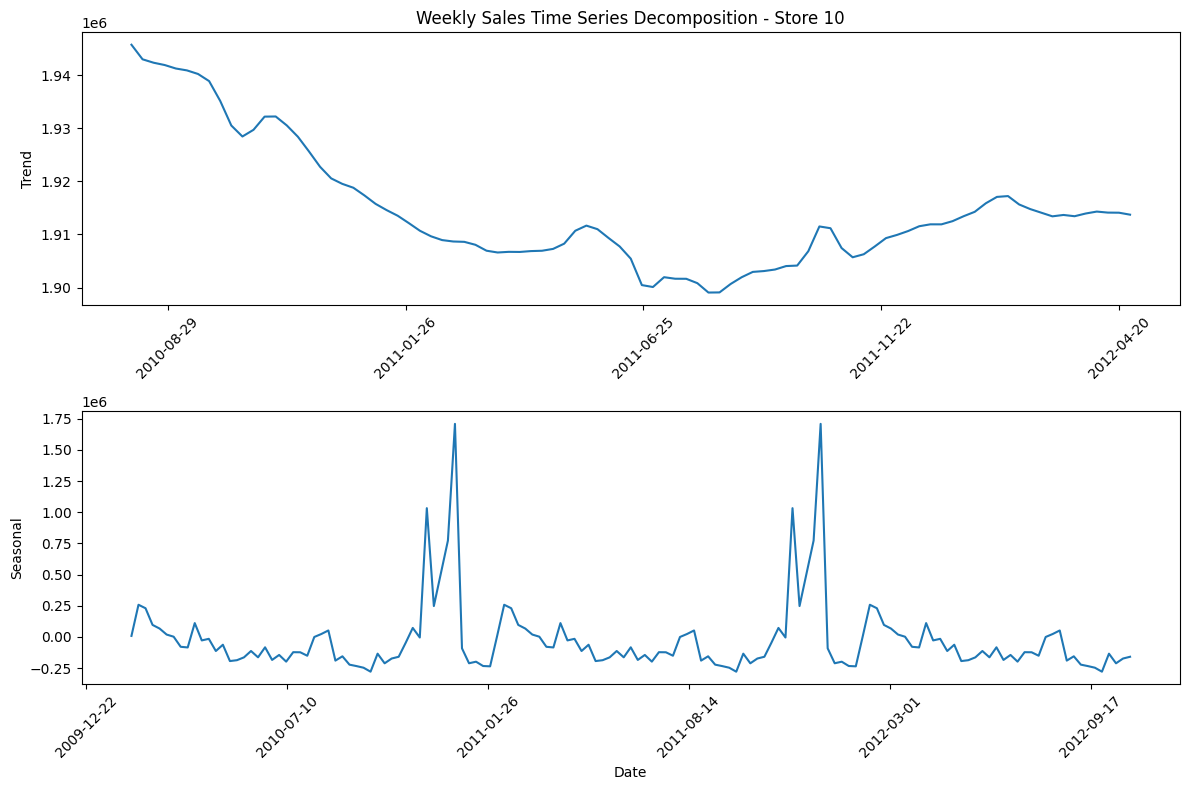

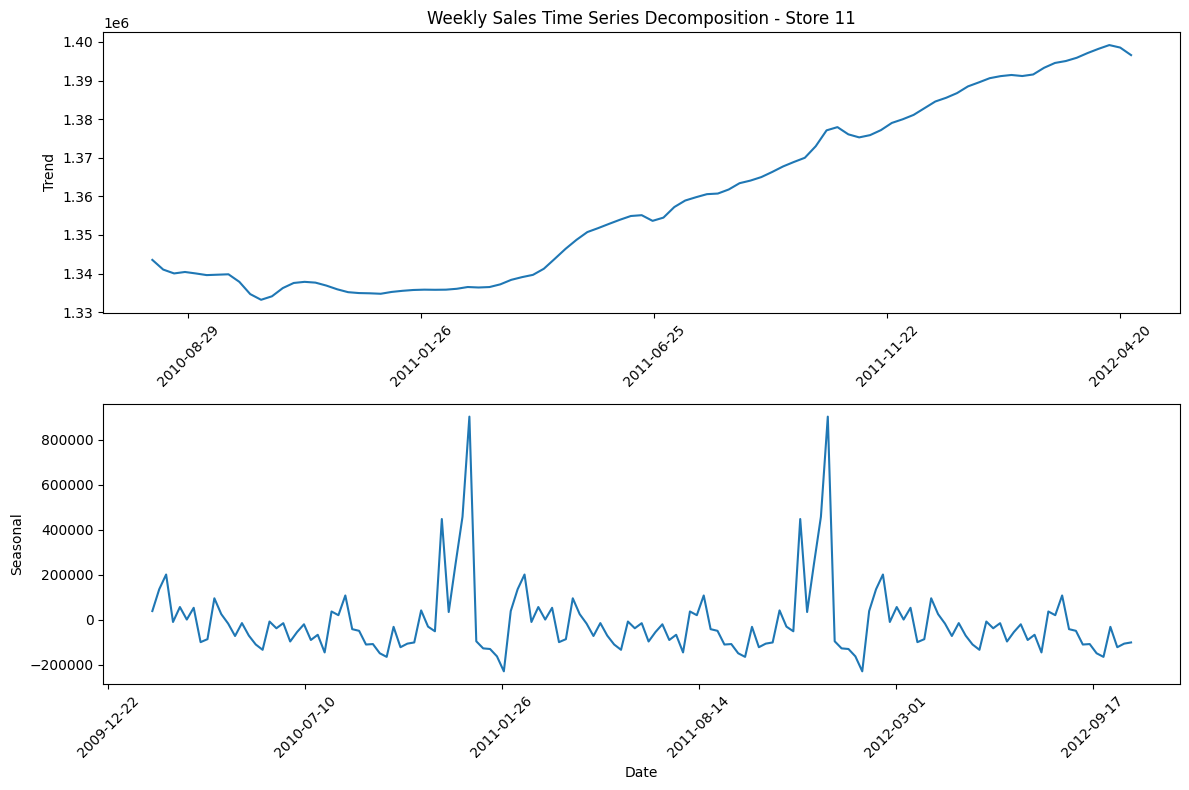

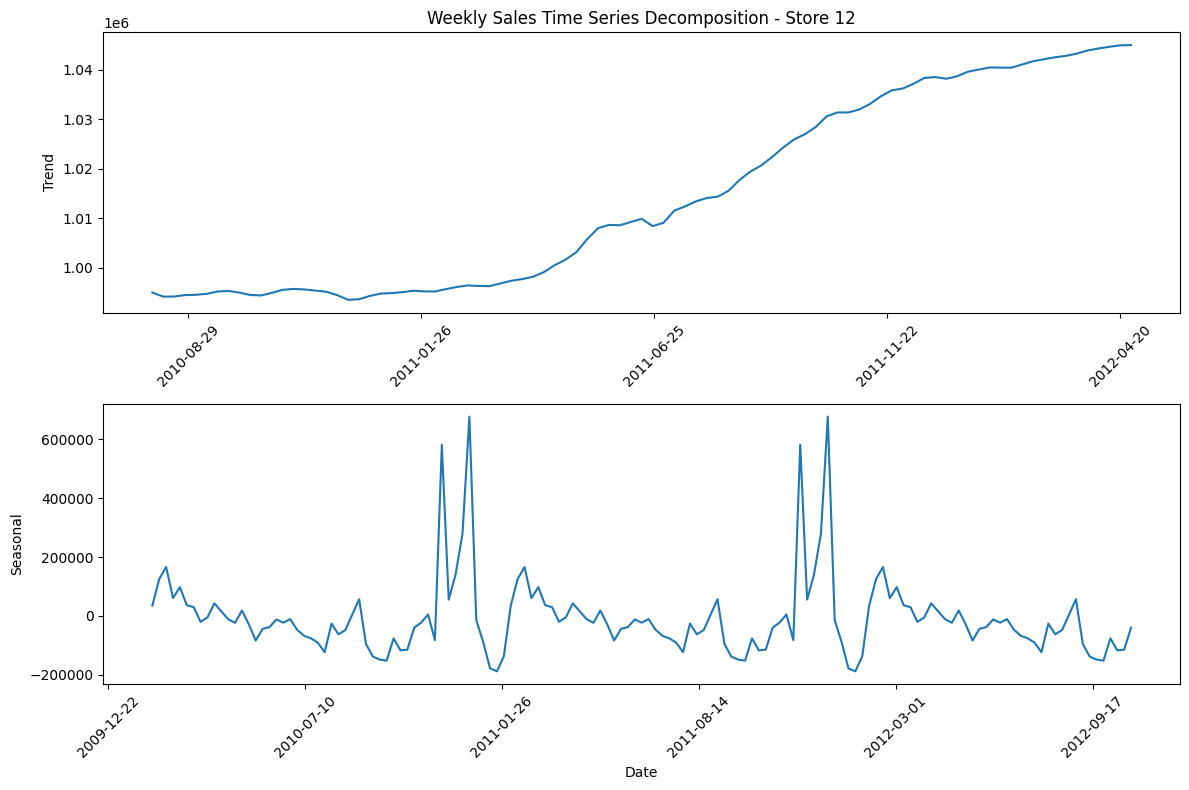

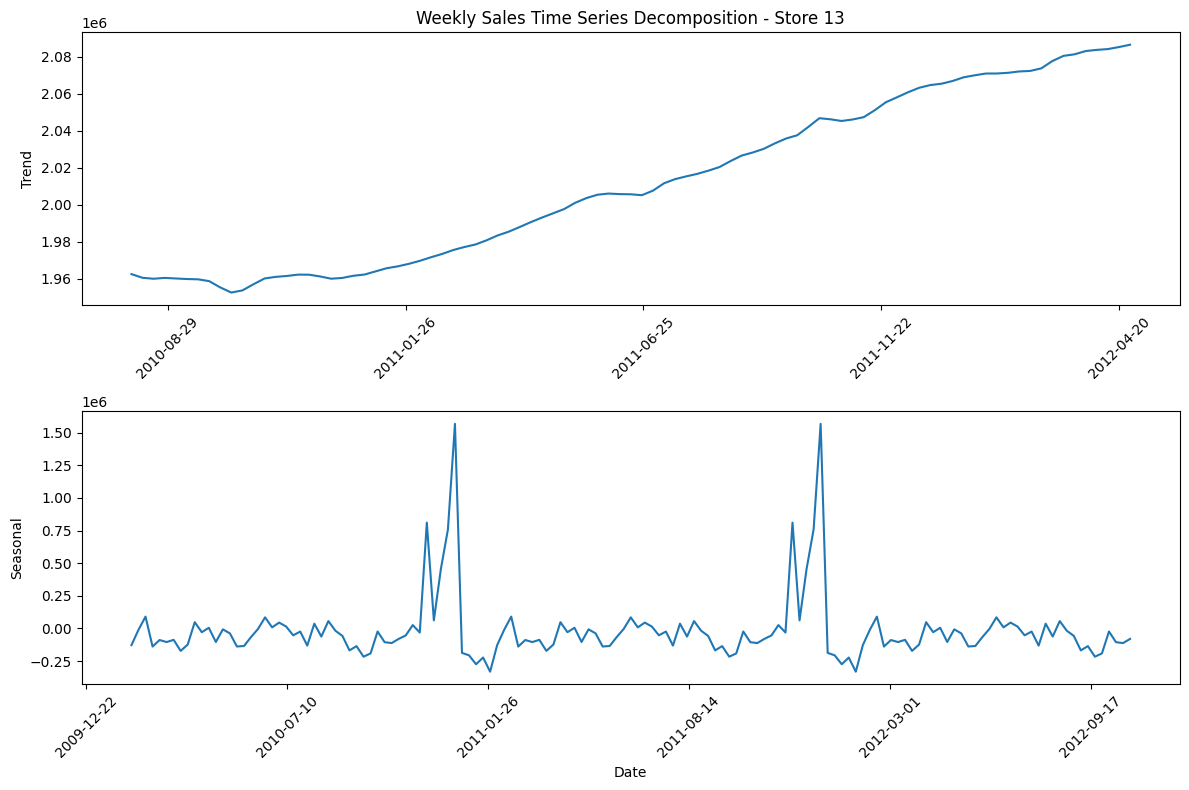

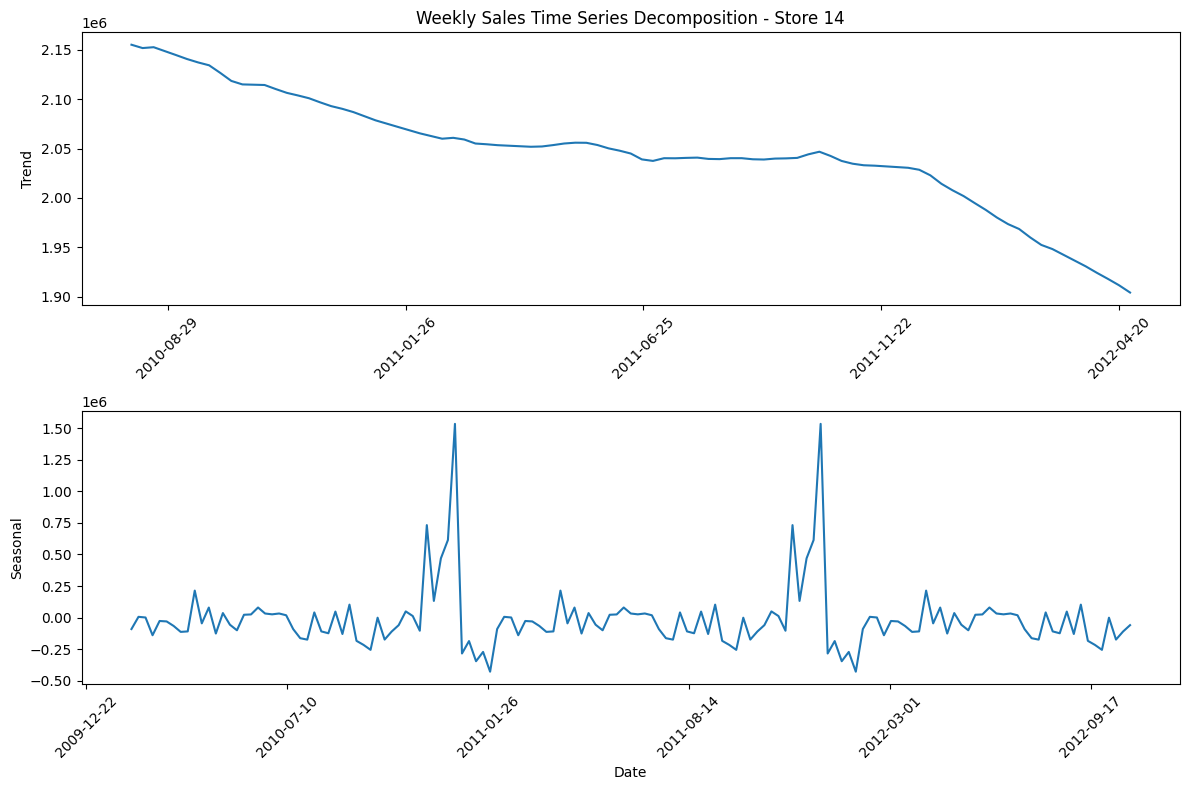

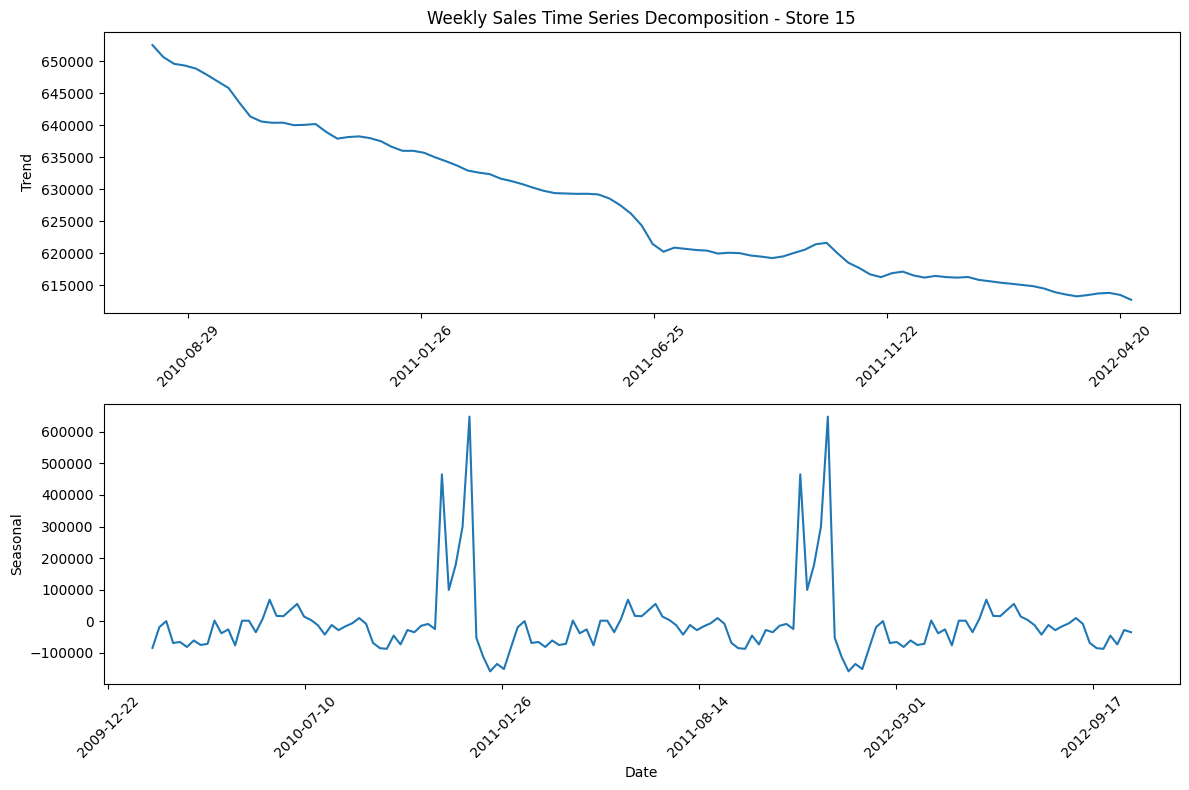

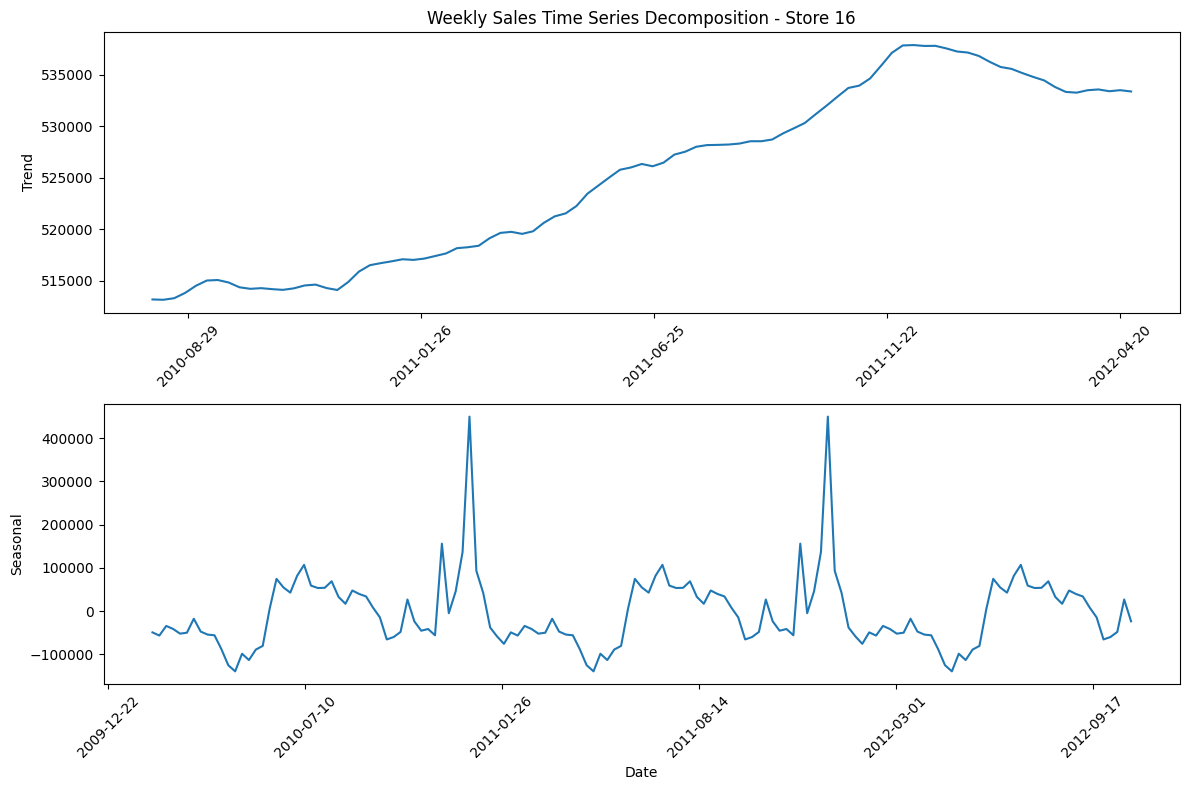

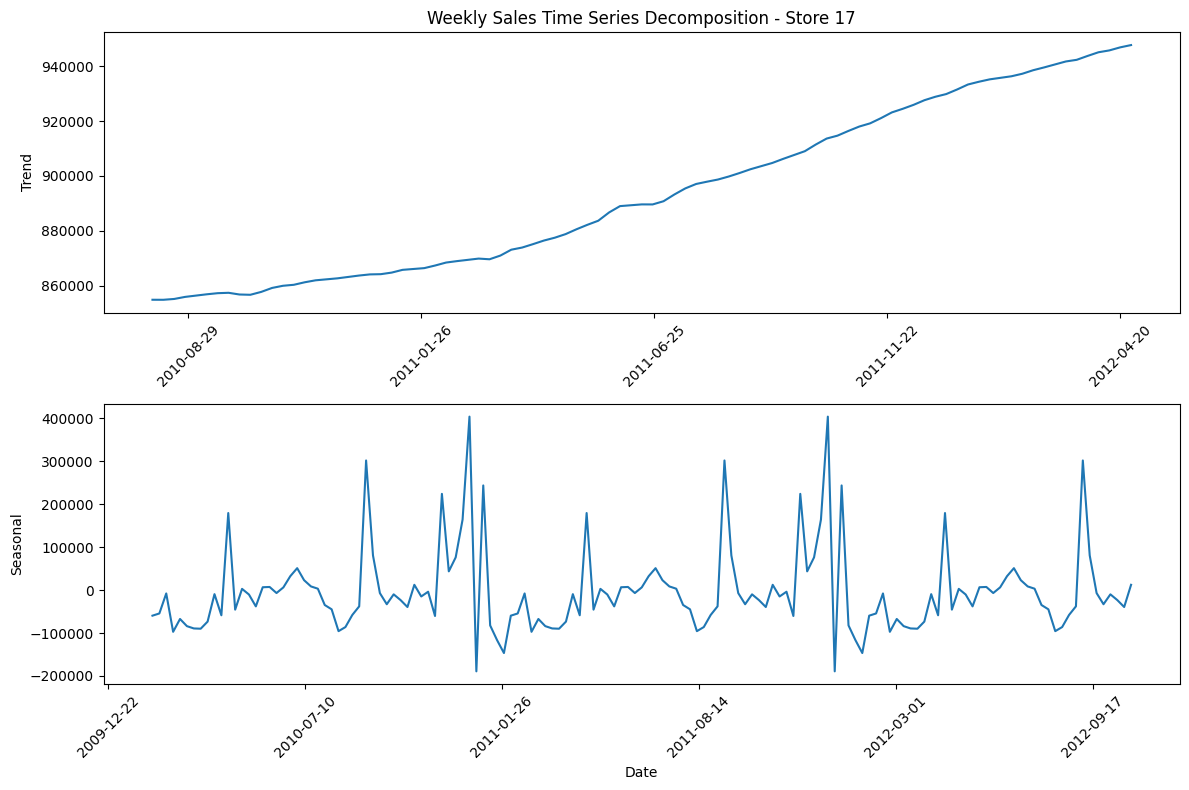

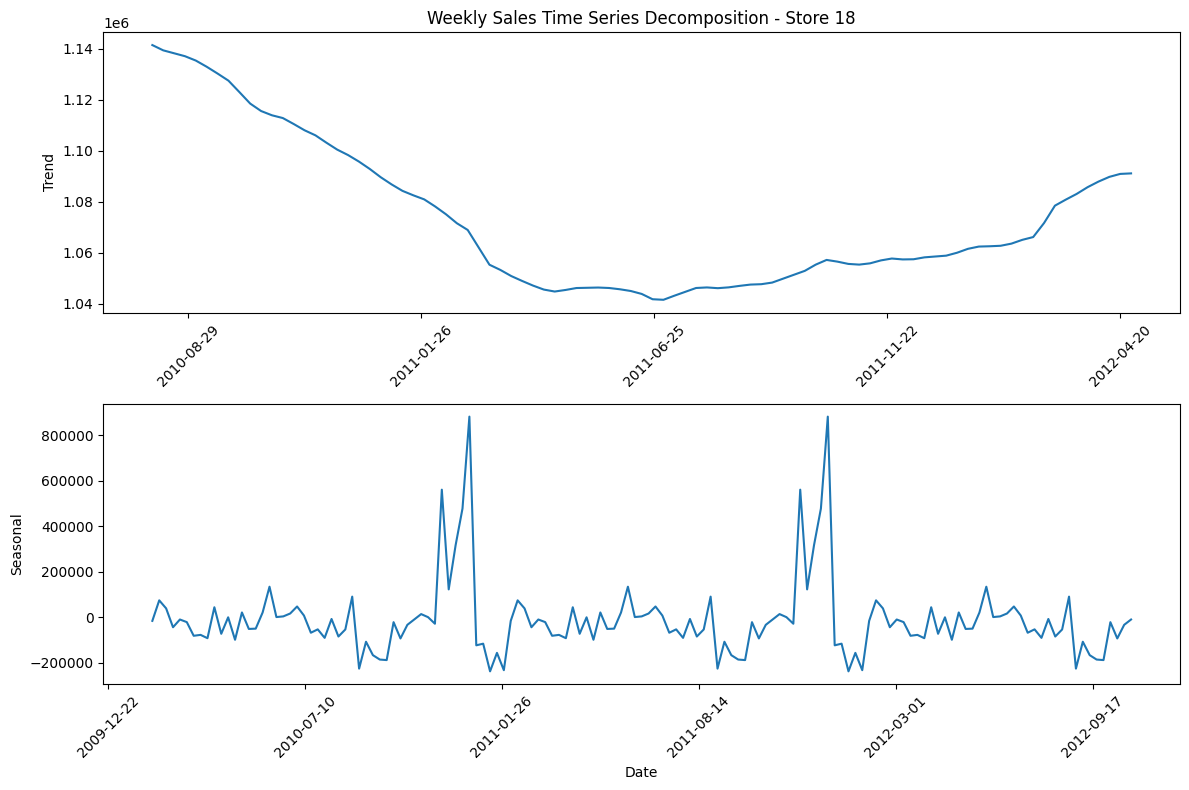

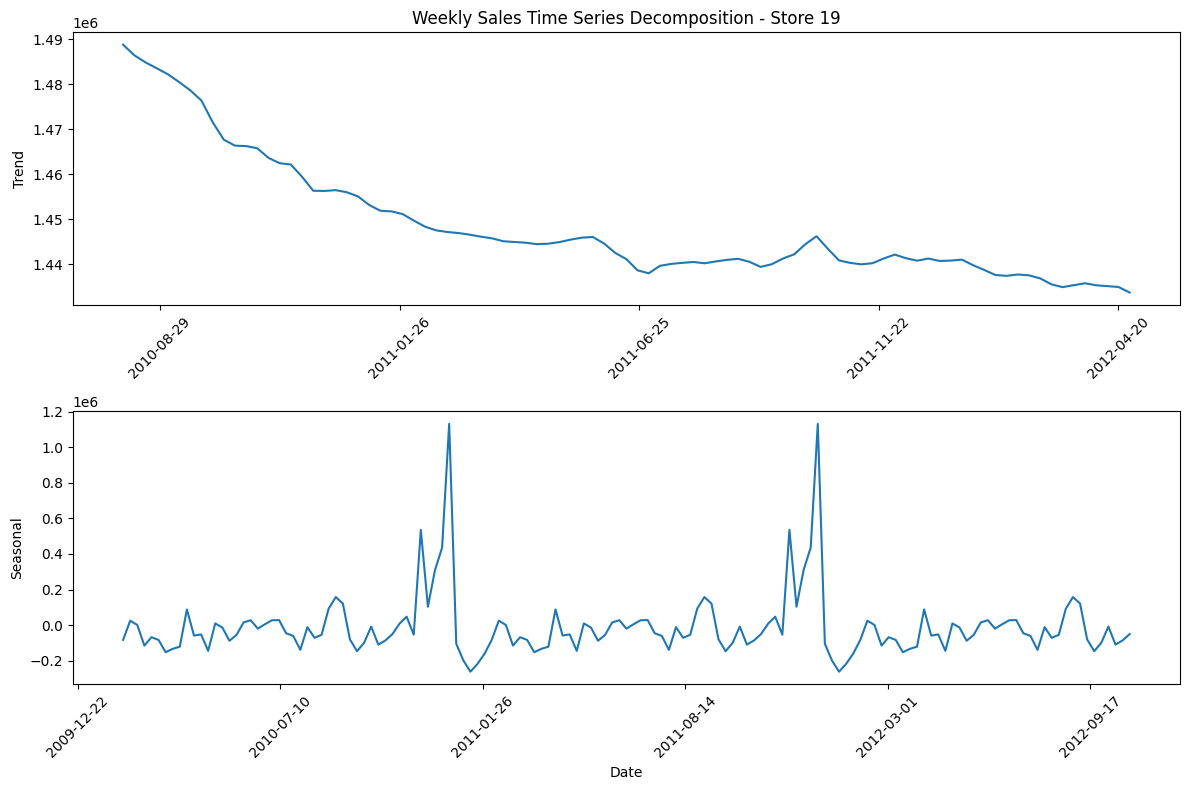

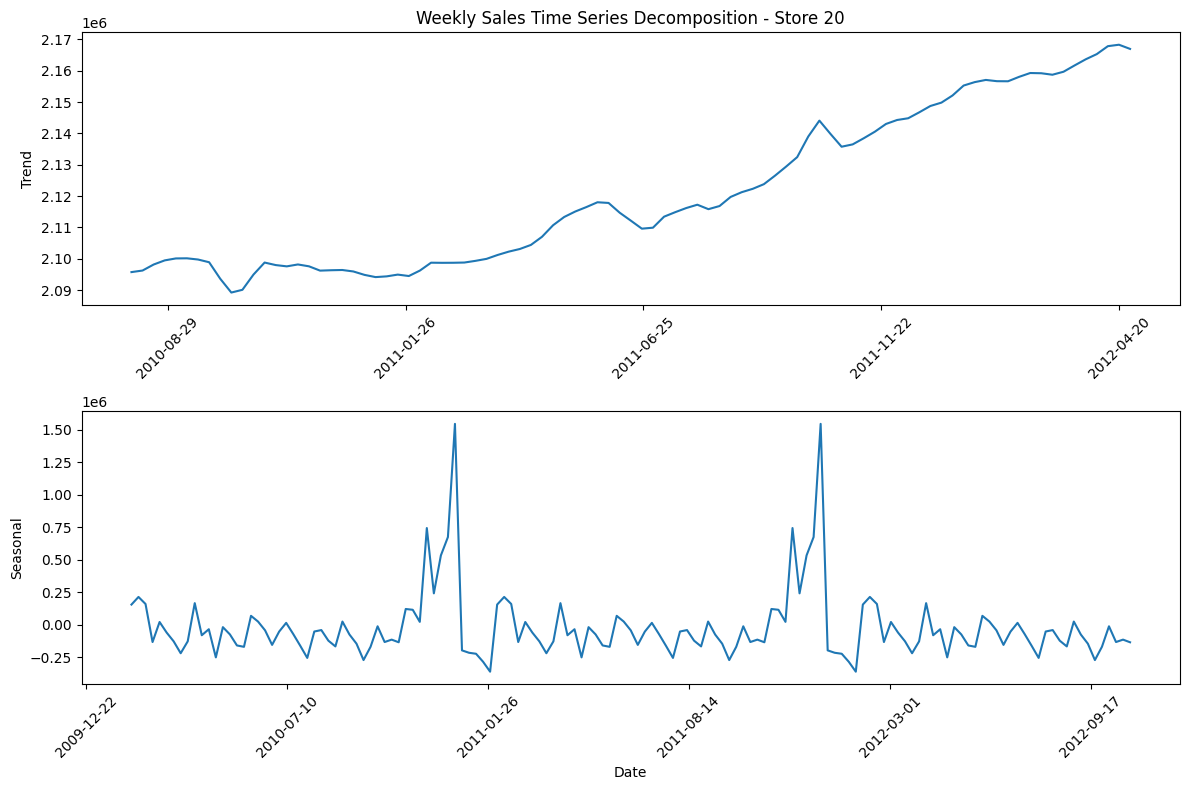

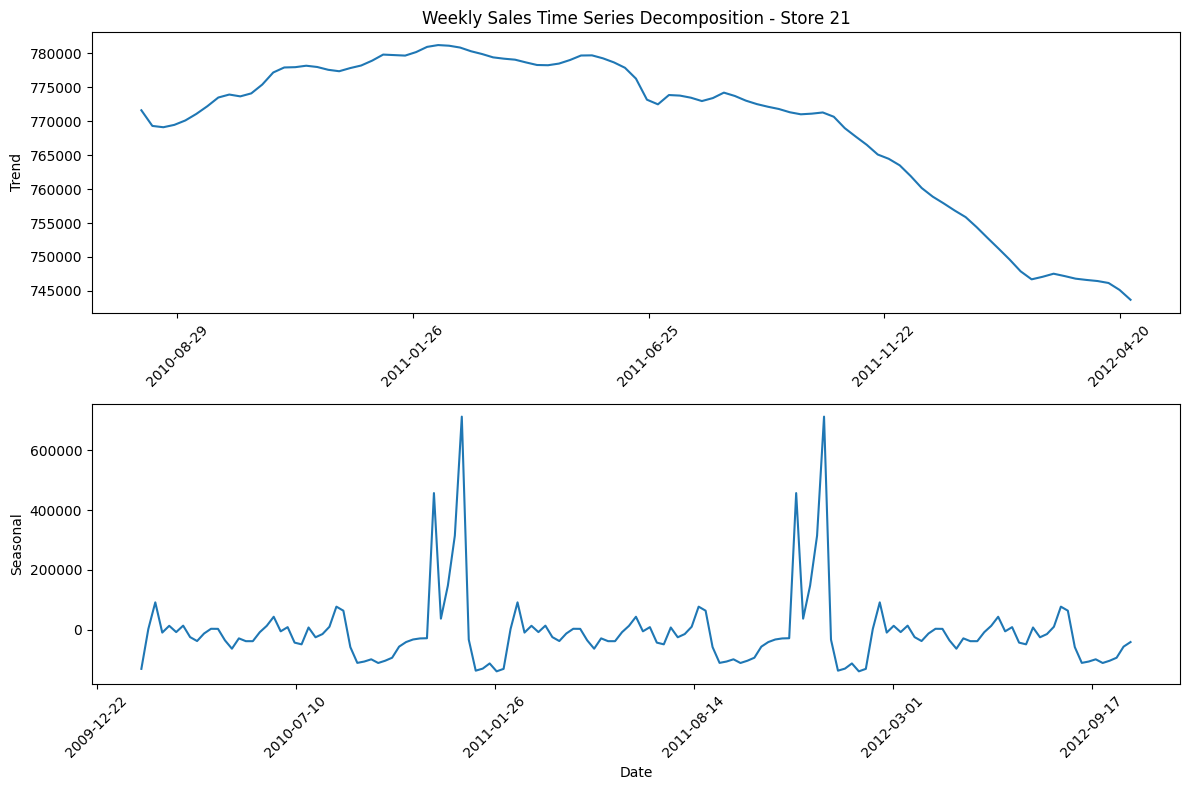

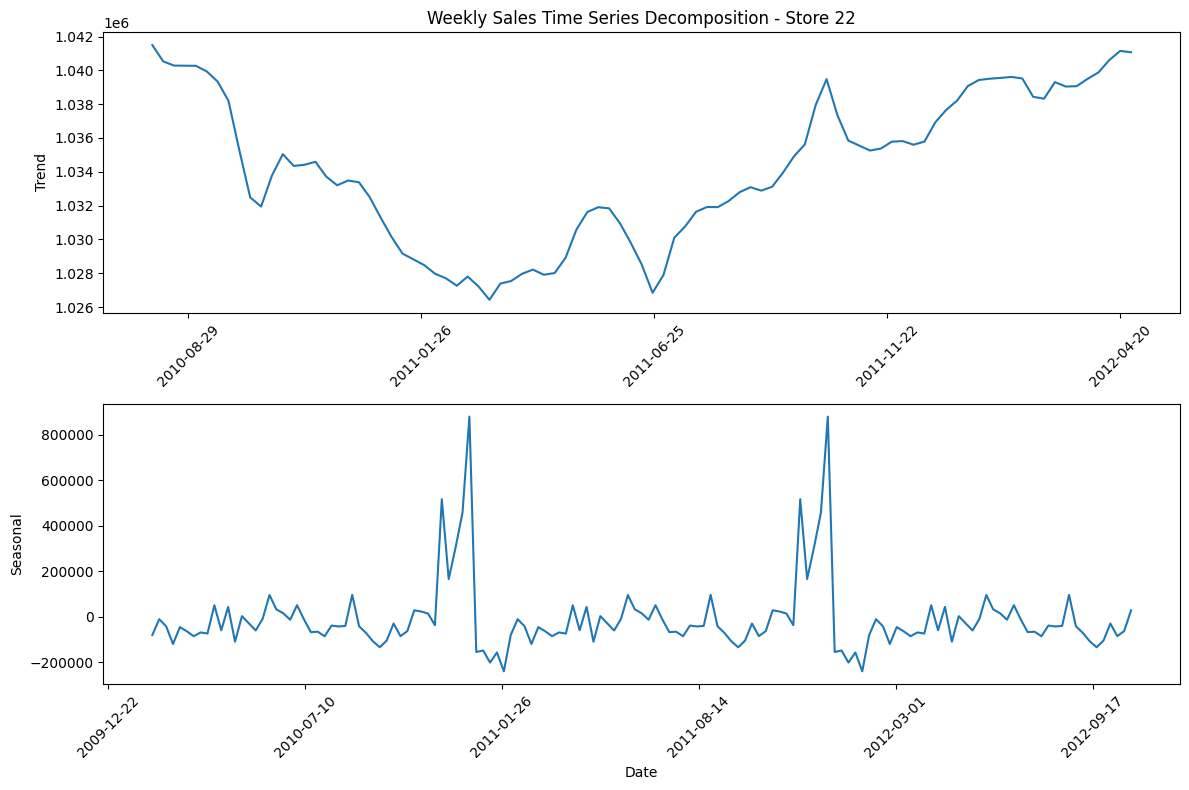

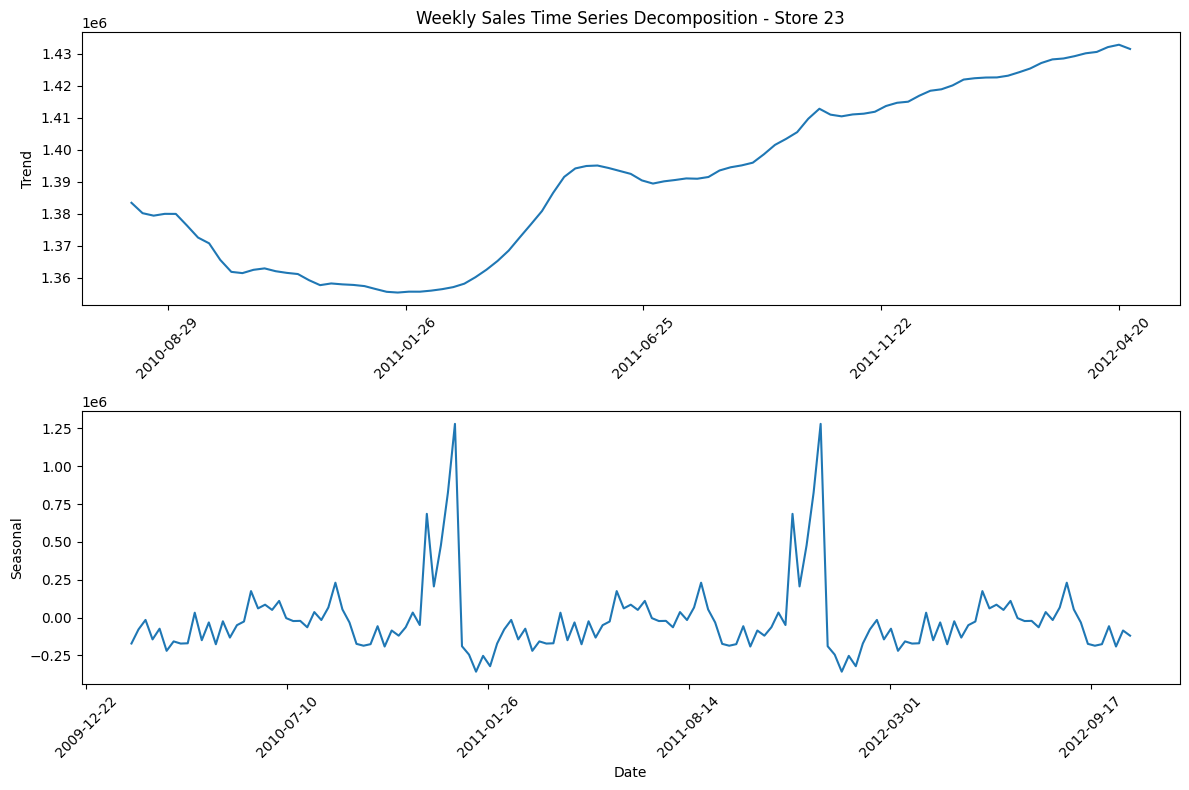

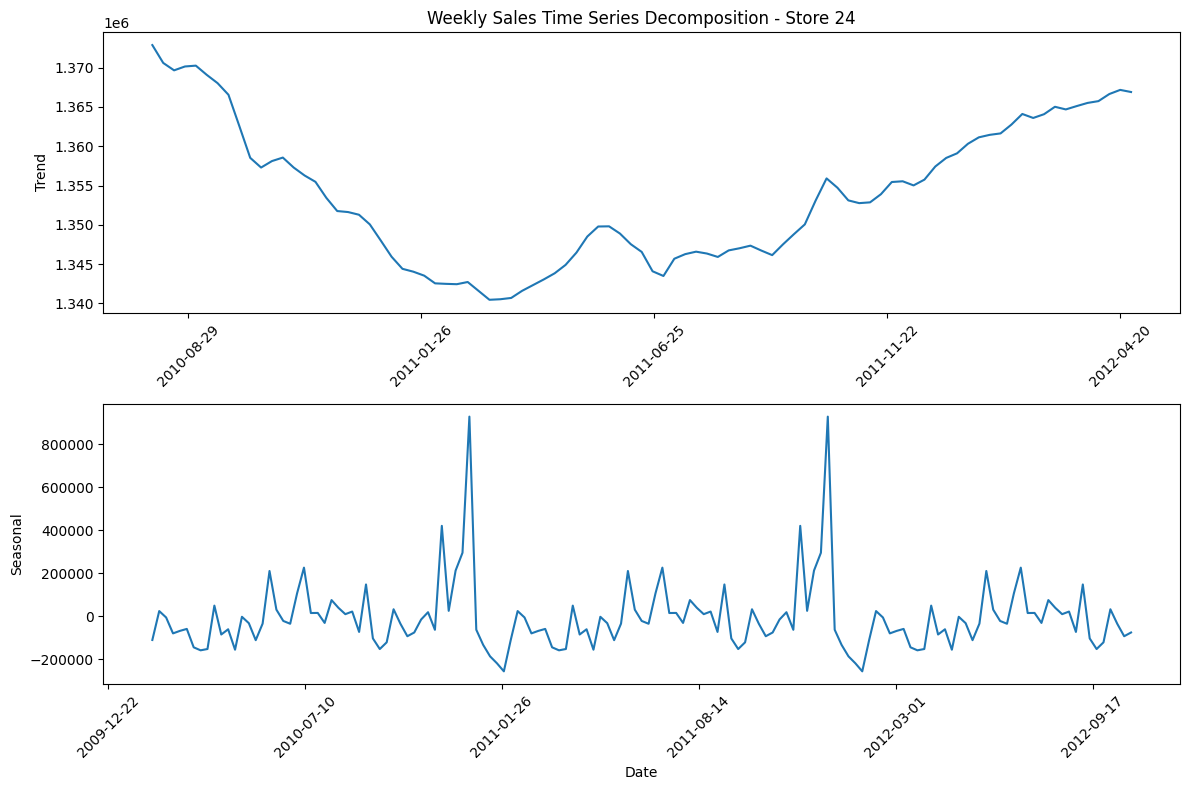

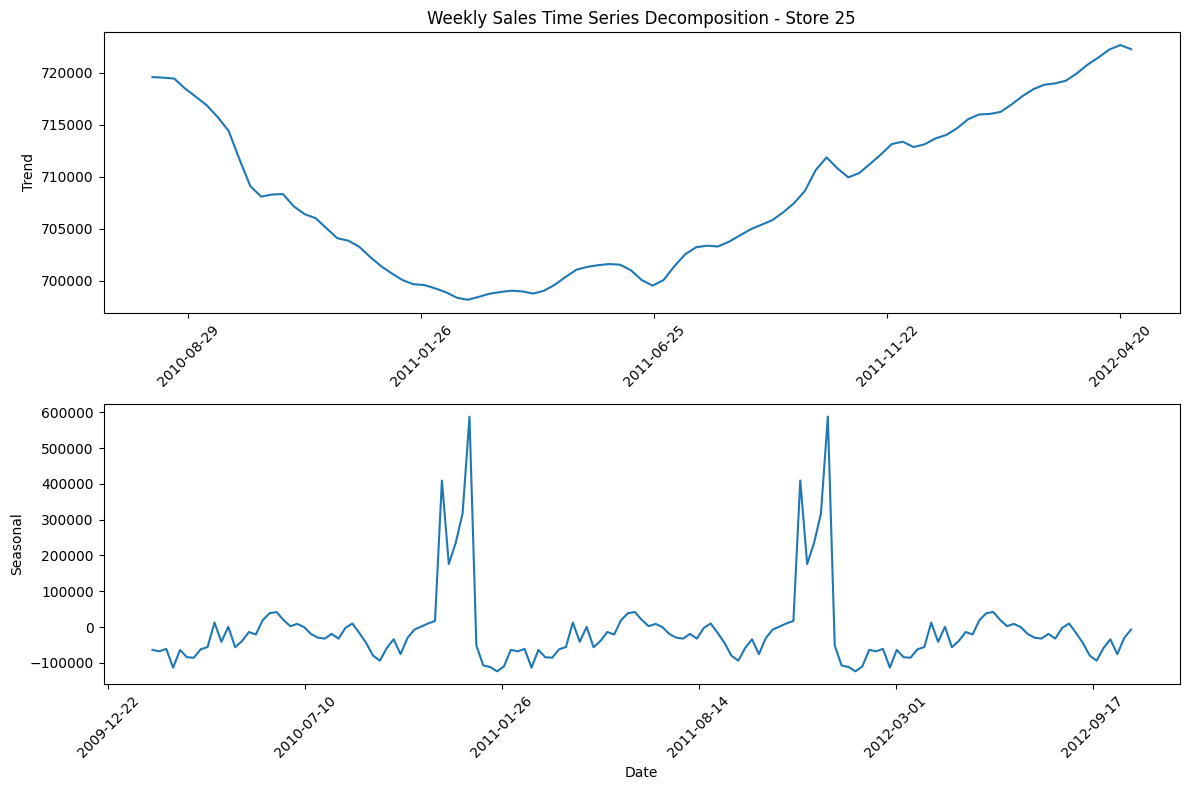

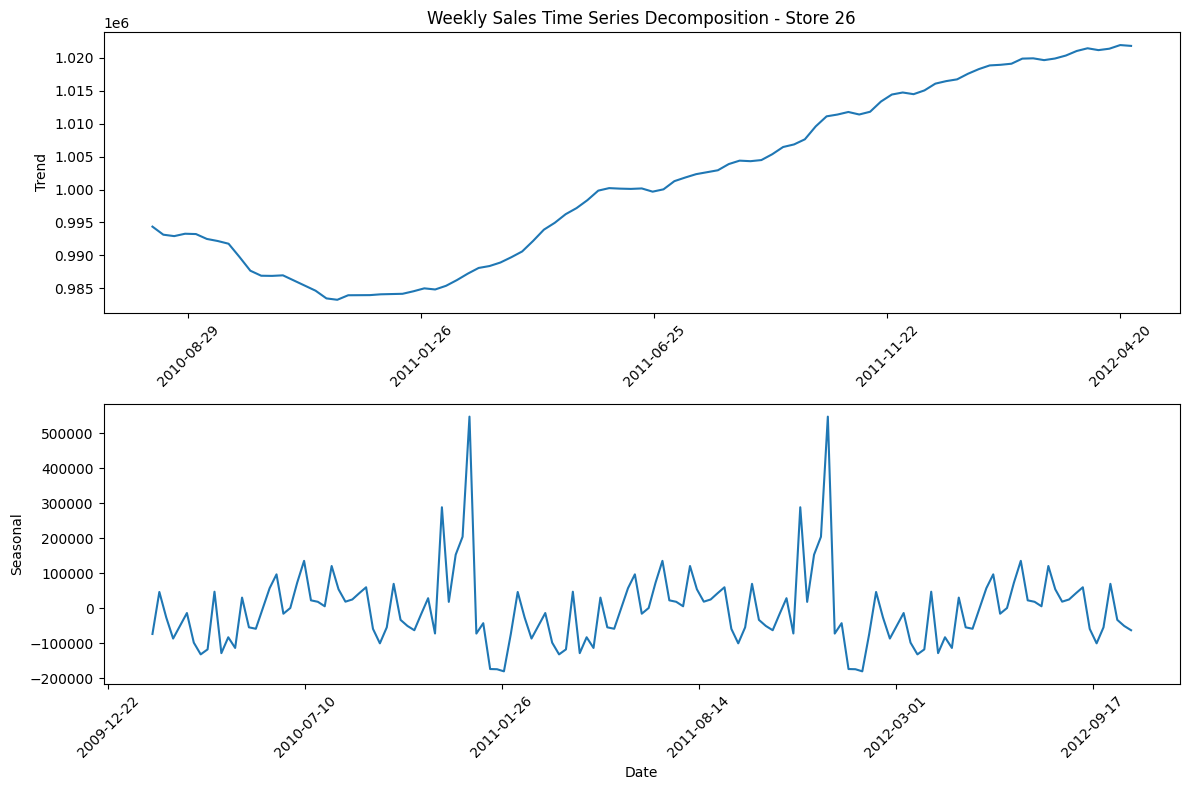

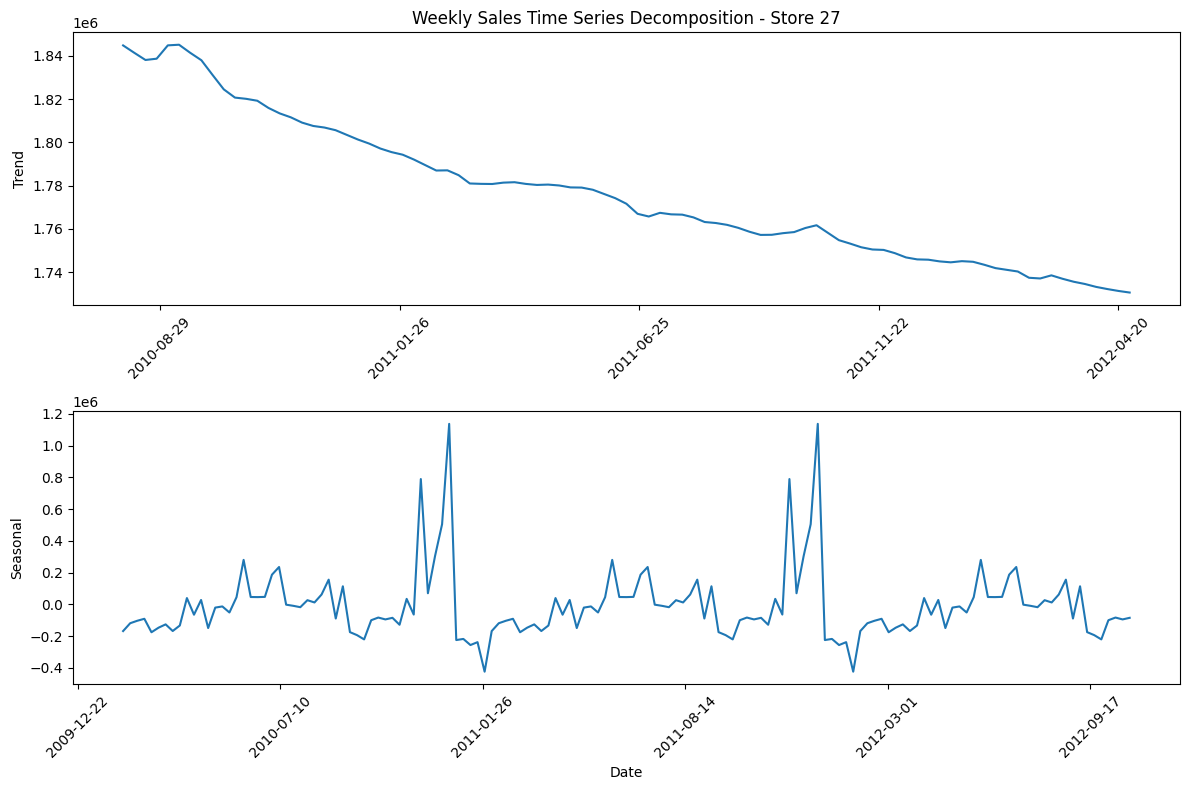

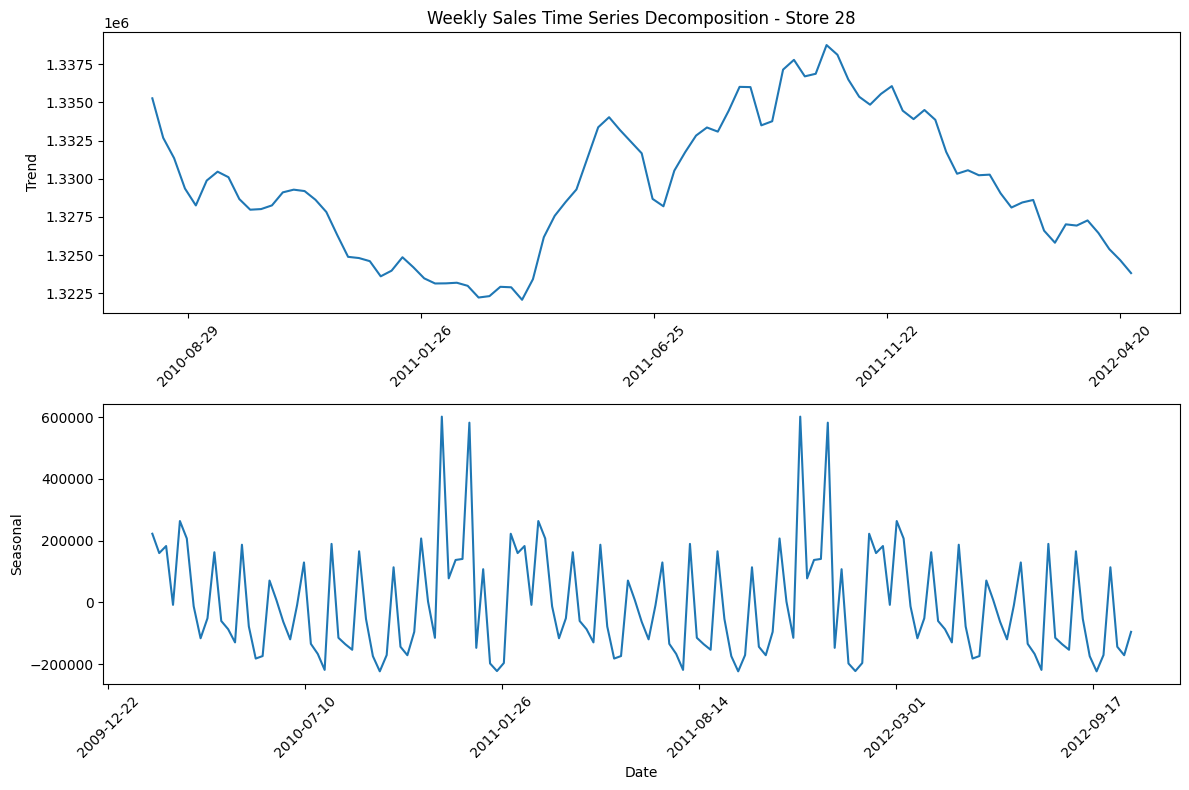

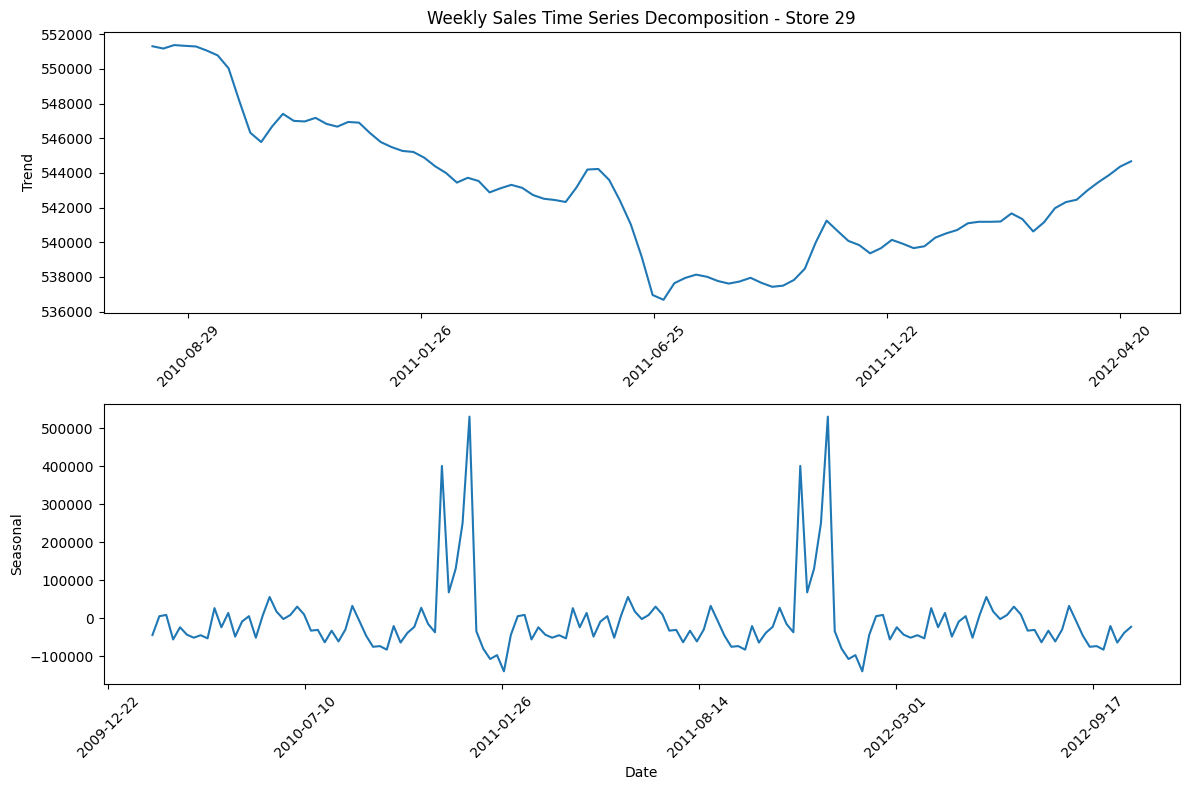

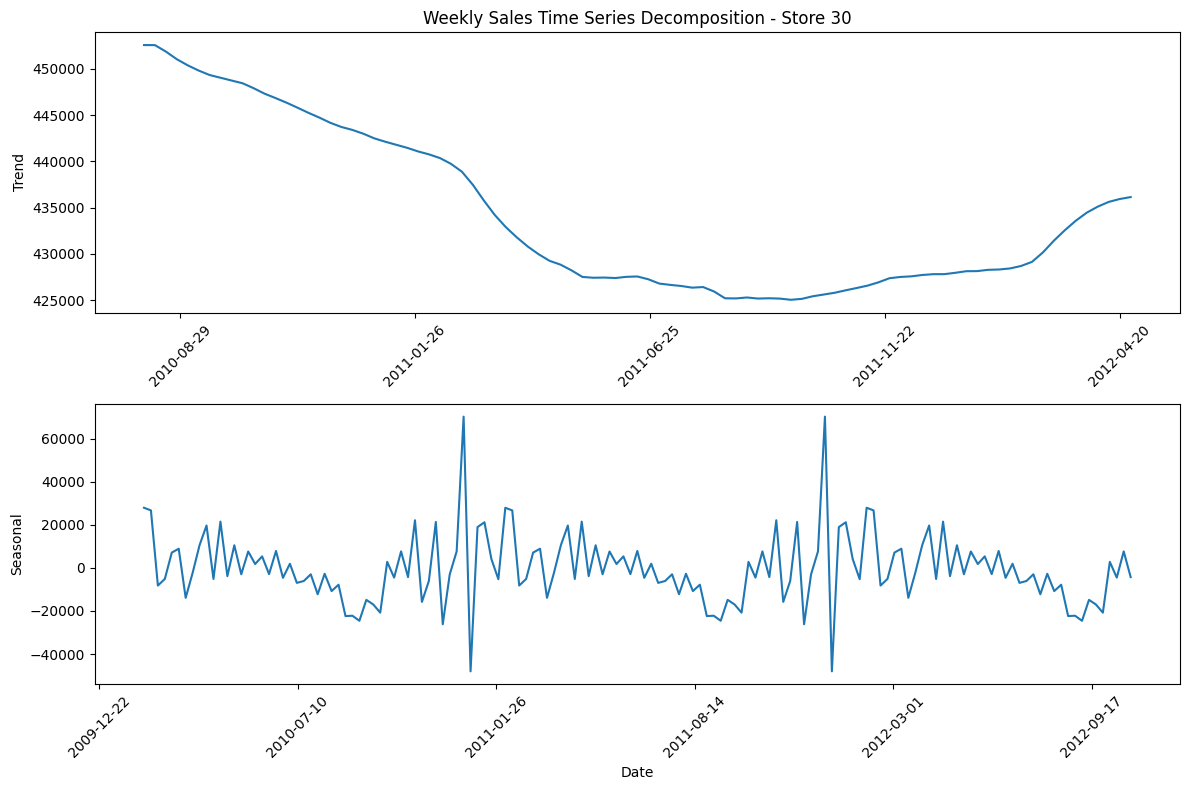

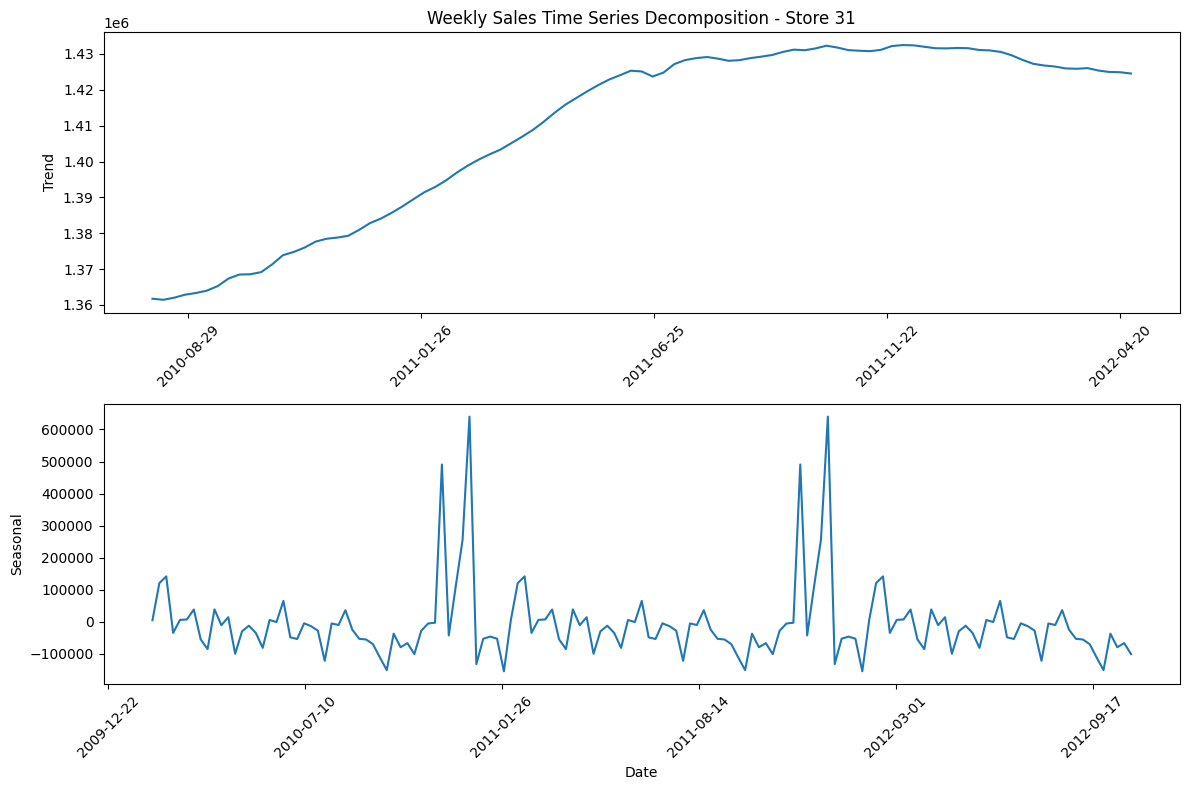

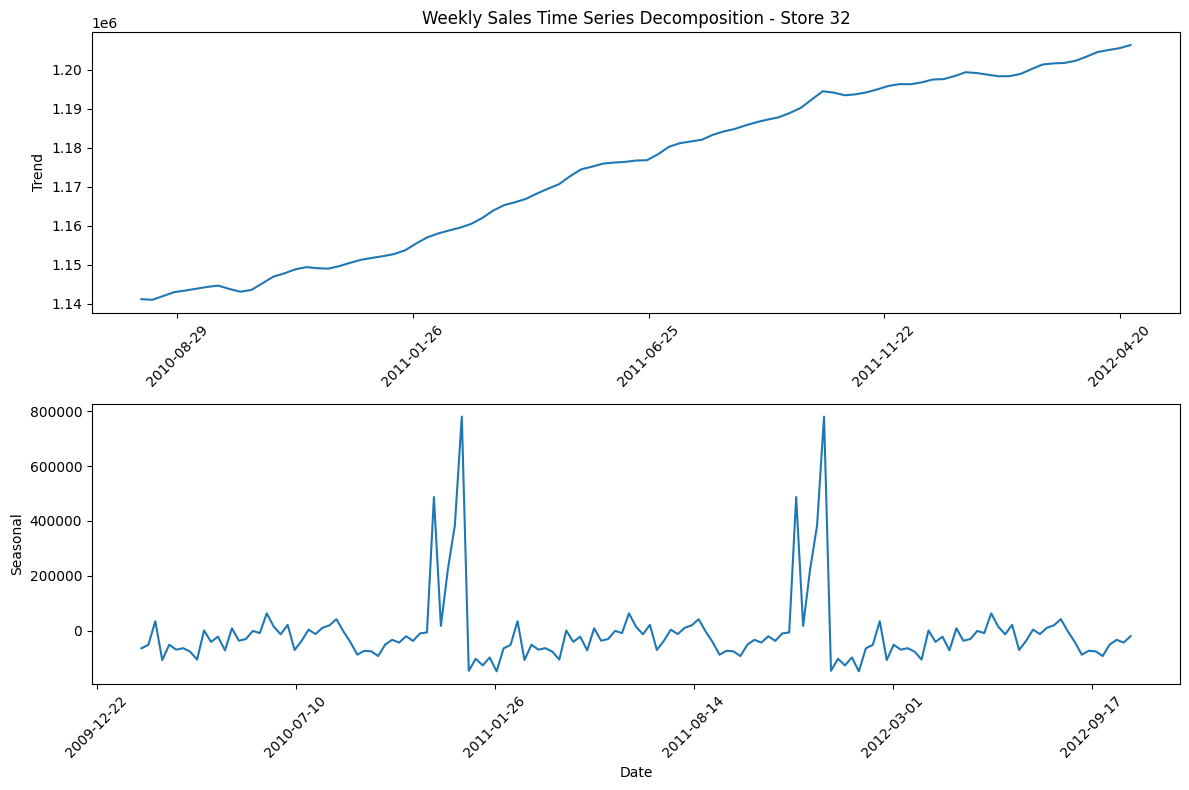

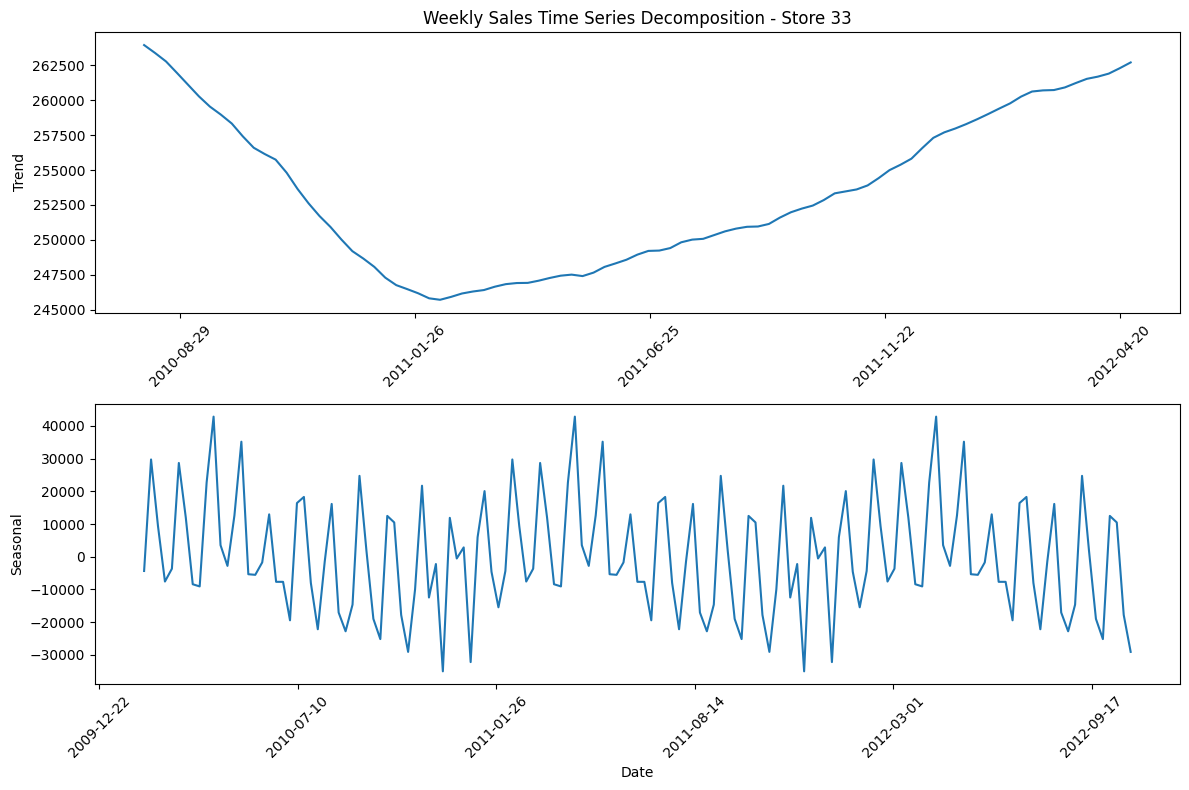

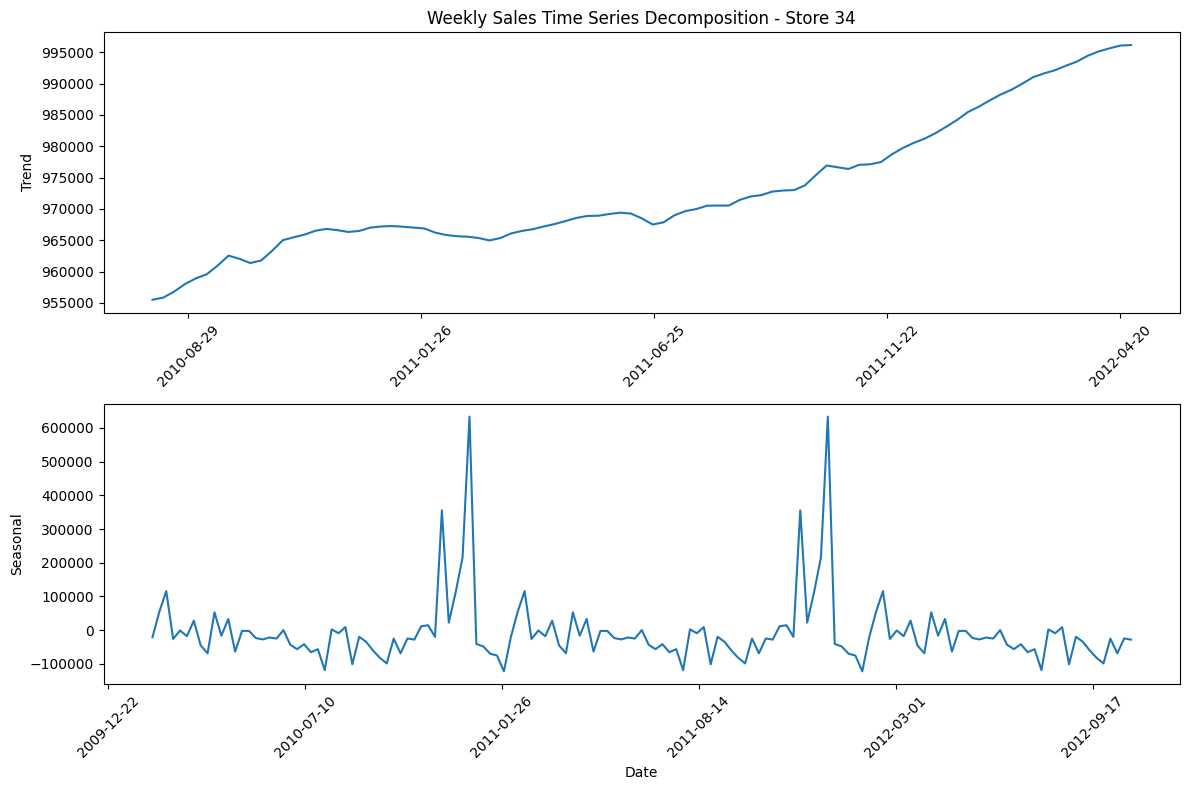

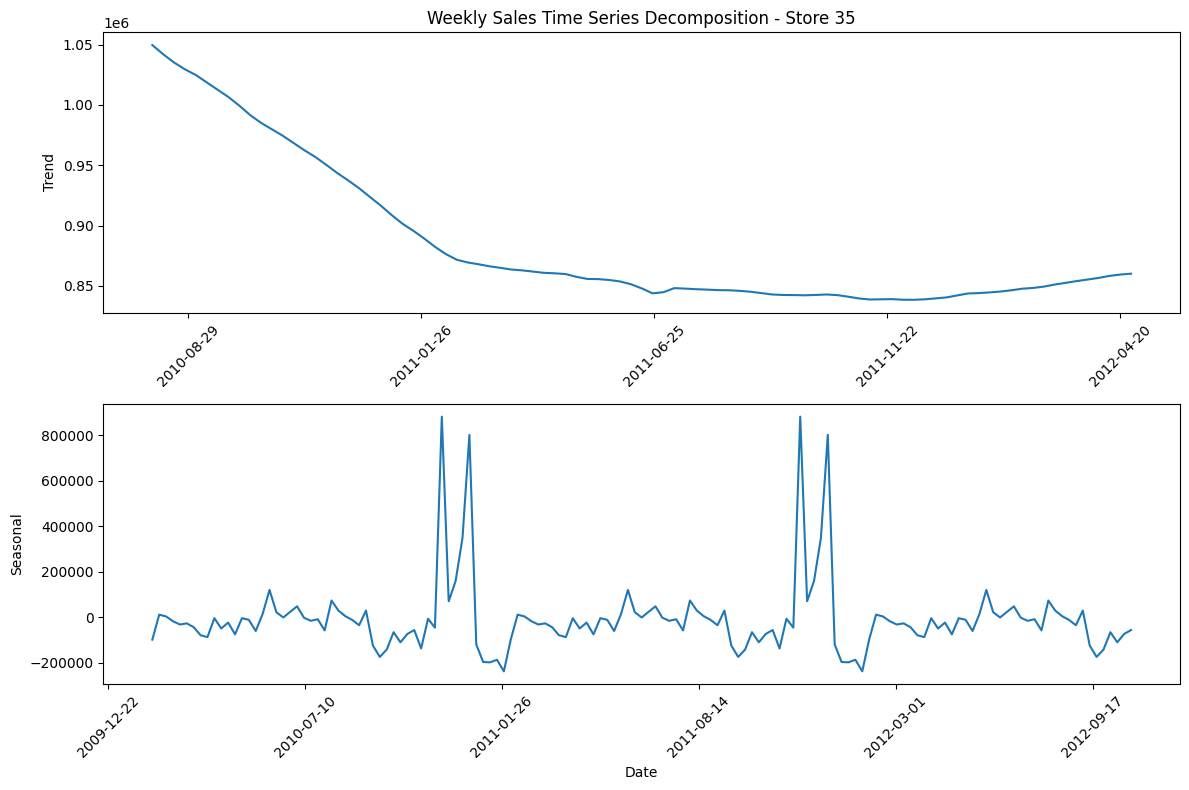

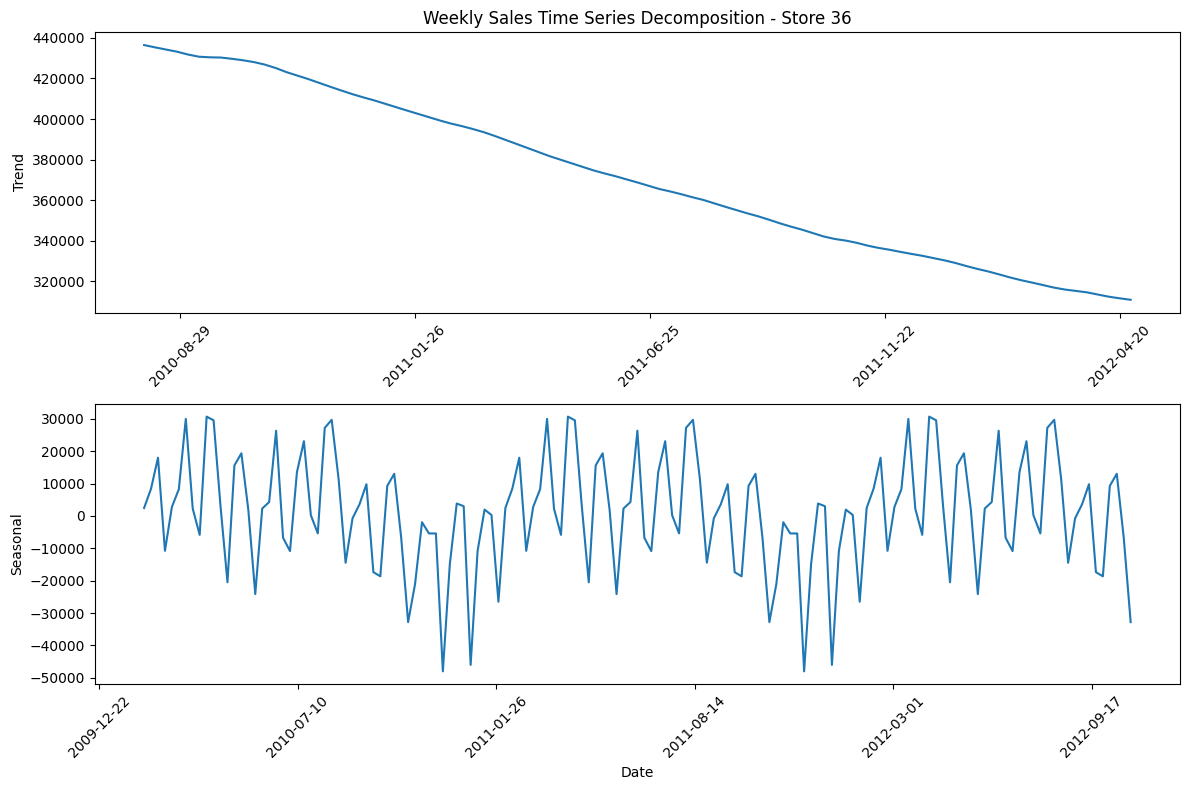

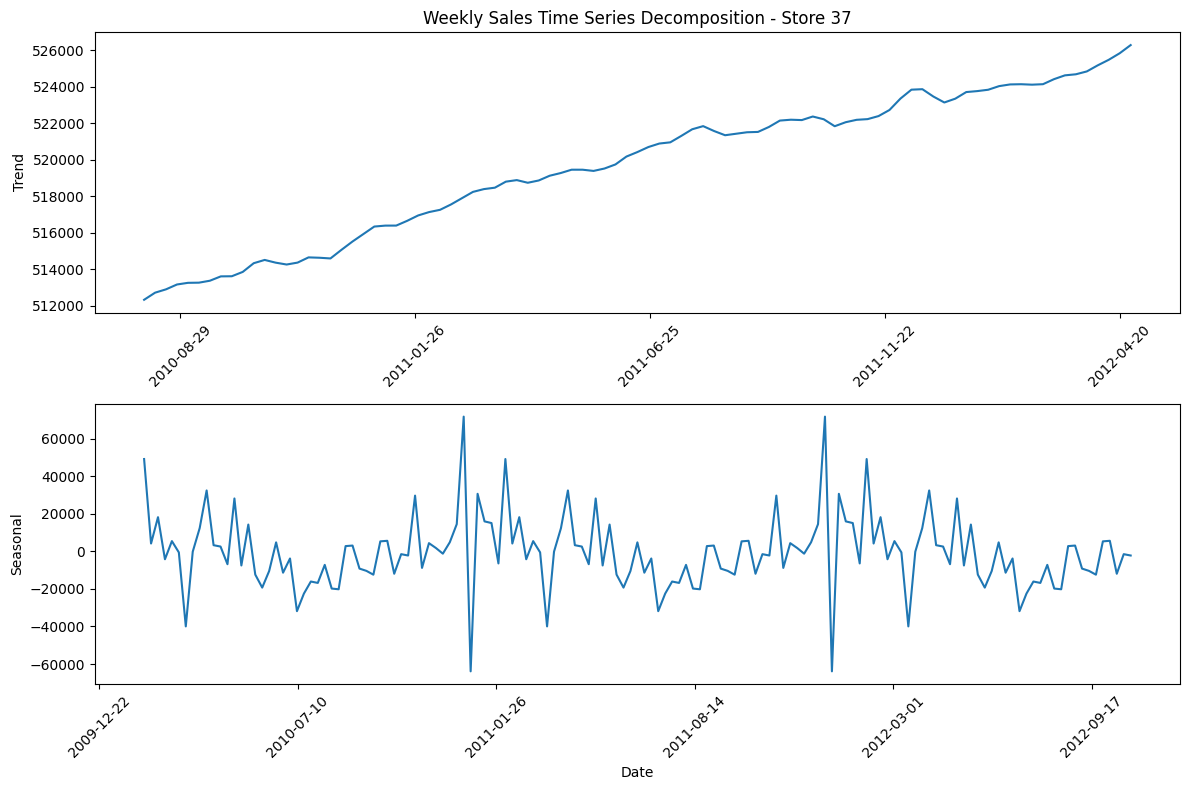

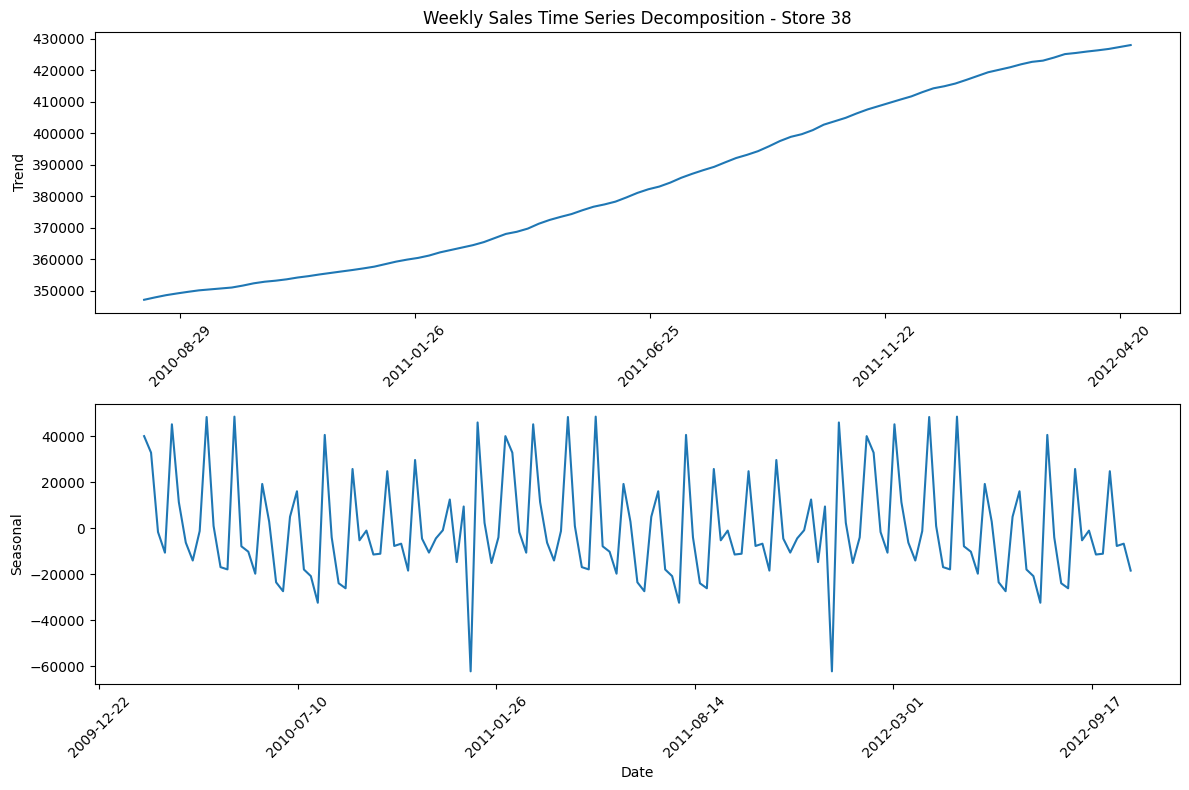

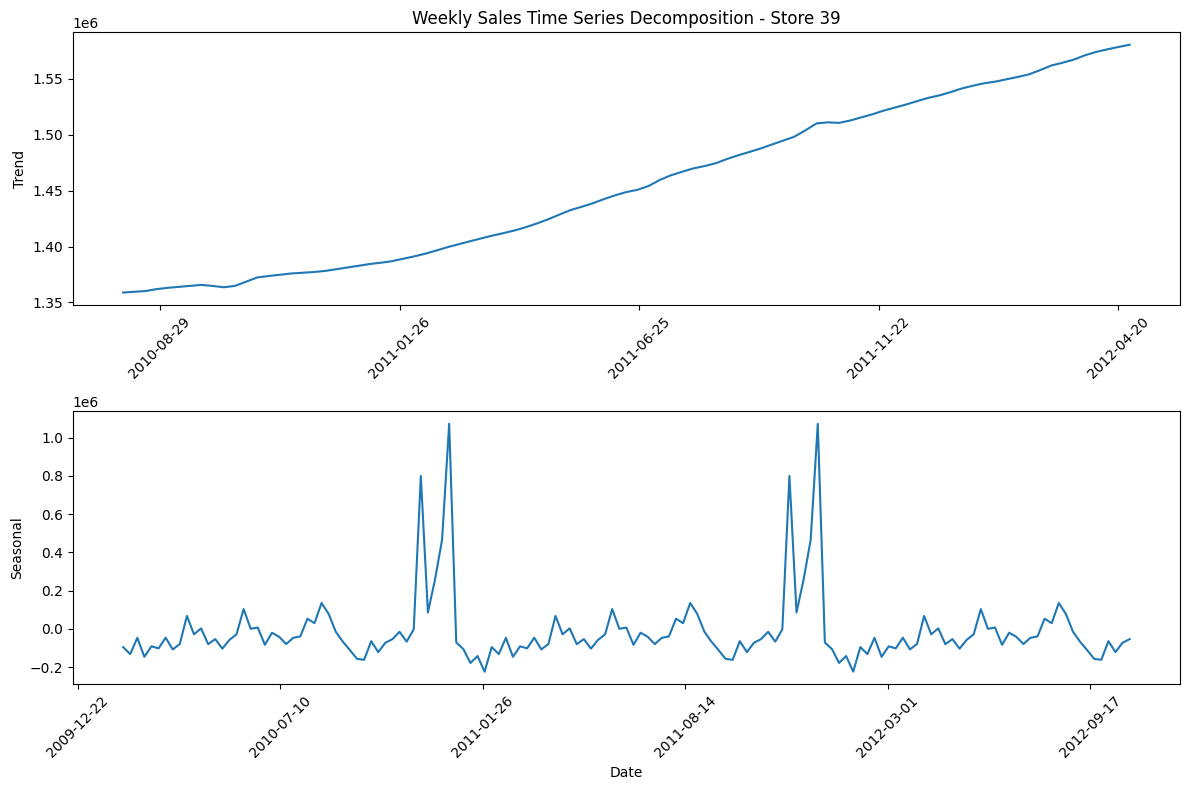

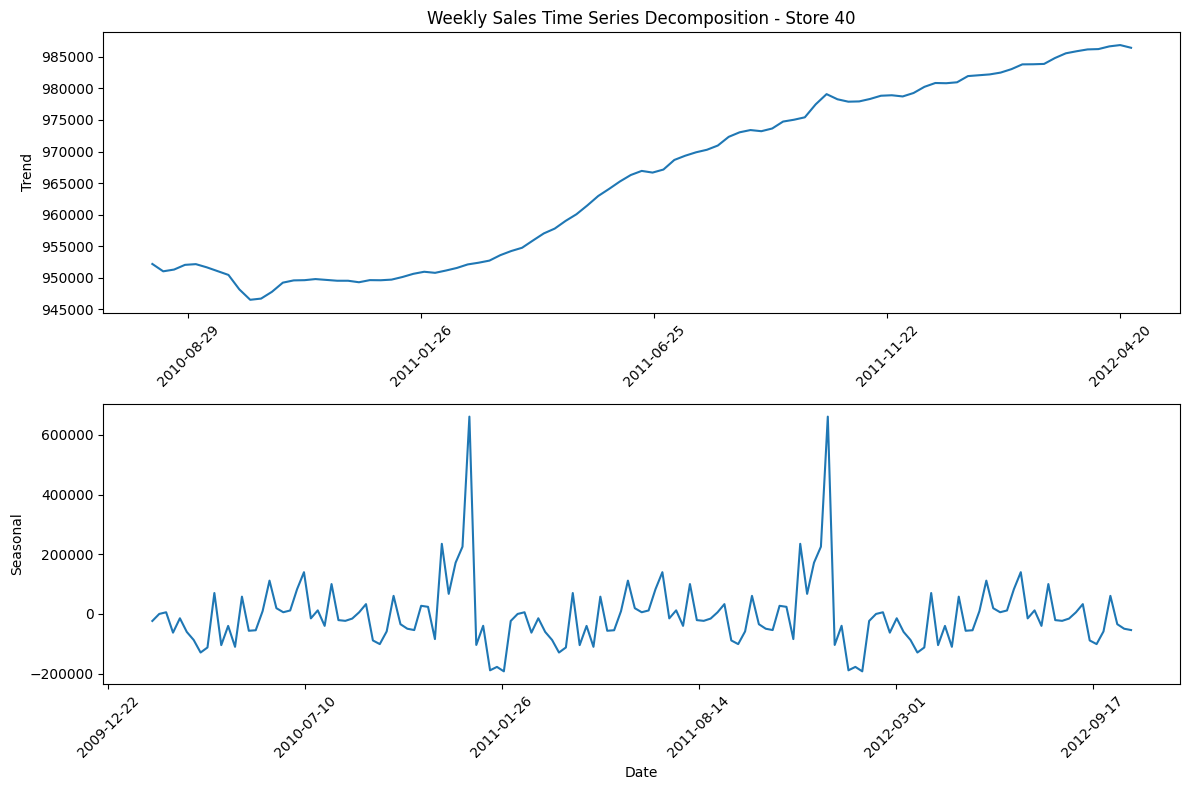

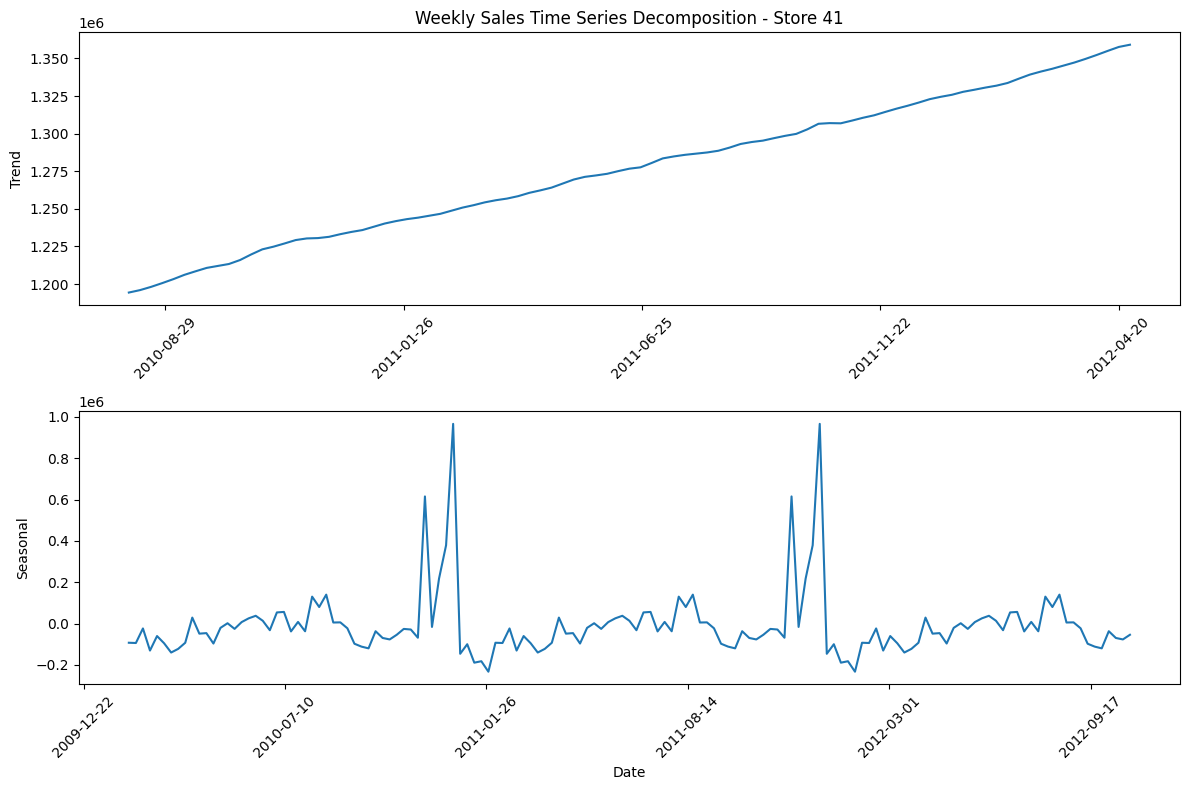

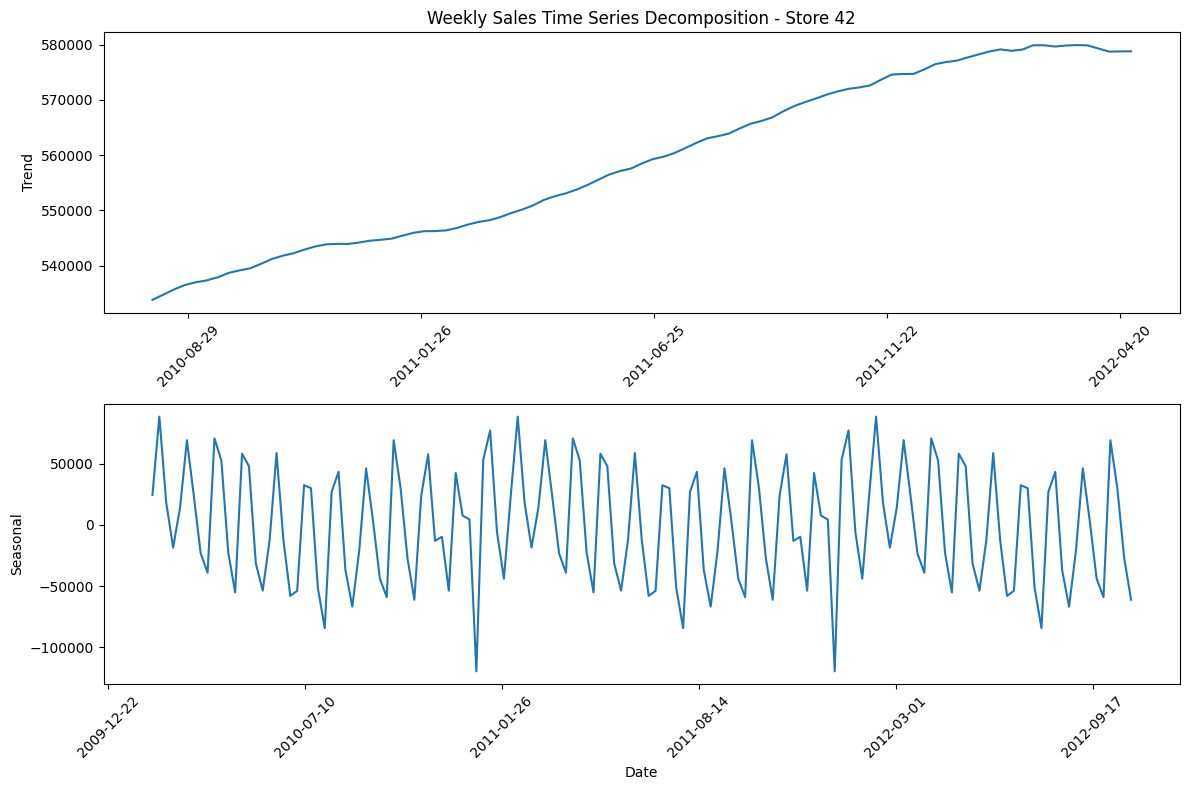

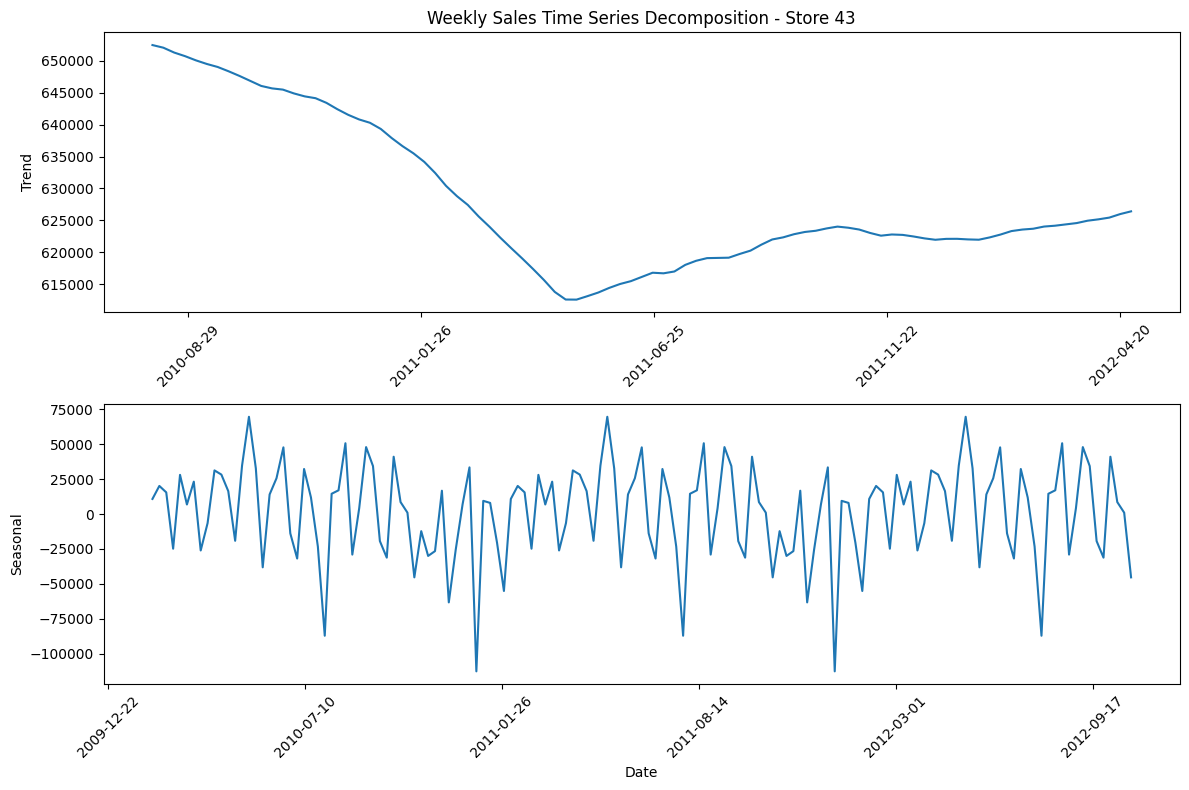

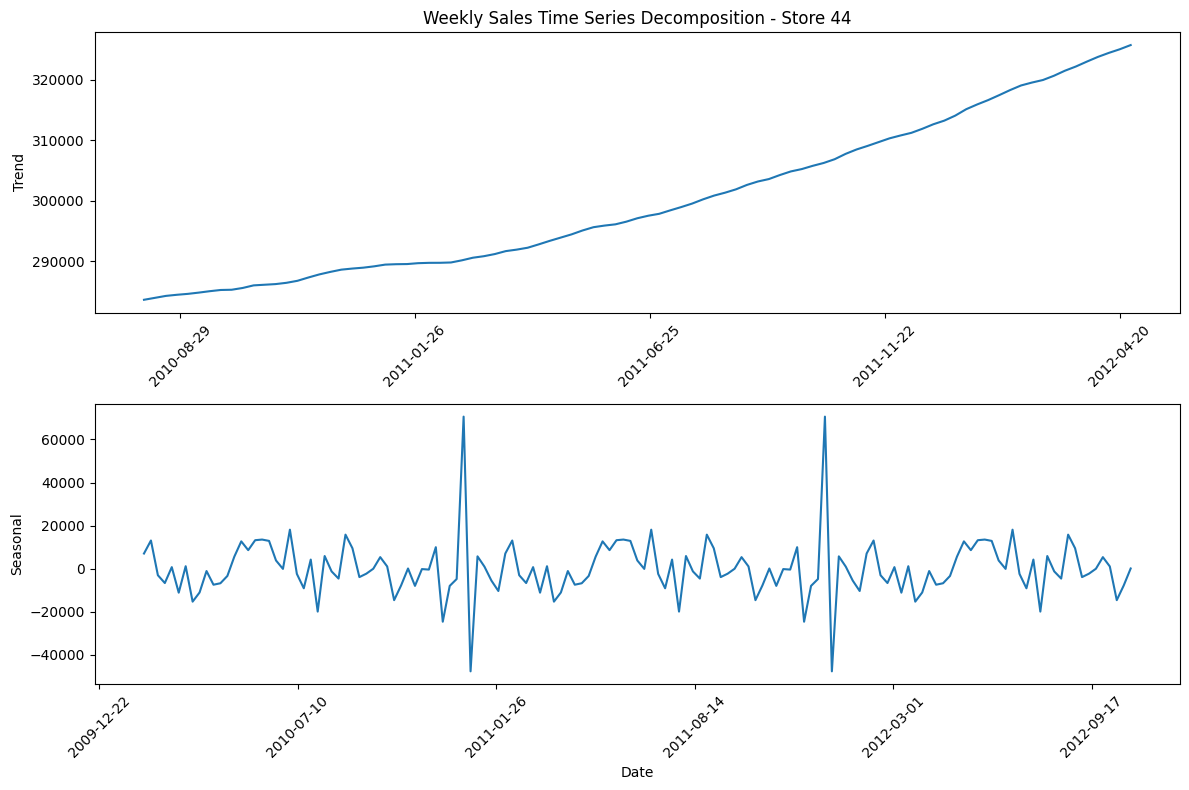

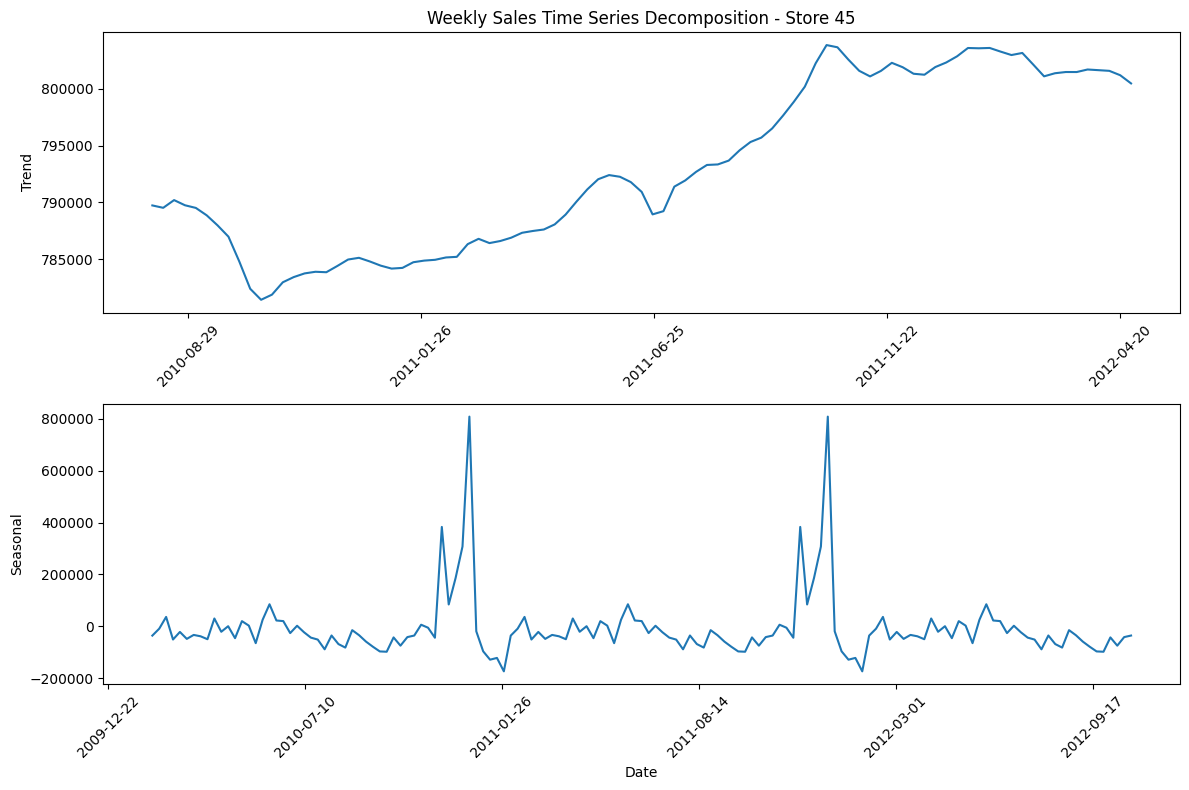

In [9]:
# Initialize a dictionary to store trend and seasonal data for all stores
all_data = {}

# Loop through each store and perform time series analysis
for store, store_data in grouped_data:
    # Perform time series decomposition for each store's sales data
    result = seasonal_decompose(store_data['Weekly_Sales'], model='additive', period=52)

    # Convert trend and seasonal data to dictionaries
    trend_data = {'Date': store_data['Date'].dt.strftime('%Y-%m-%d').tolist(), 'Trend': result.trend.tolist()}
    seasonal_data = {'Date': store_data['Date'].dt.strftime('%Y-%m-%d').tolist(), 'Seasonal': result.seasonal.tolist()}

    # Store trend and seasonal data in the all_data dictionary
    all_data[f'Store_{store}_Trend'] = trend_data
    all_data[f'Store_{store}_Seasonal'] = seasonal_data

    # Plot the decomposition for each store
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    ax1.plot(store_data['Date'], result.trend)  # Use 'Date' column as x-axis for the trend plot
    ax1.set_ylabel('Trend')
    ax1.set_title(f'Weekly Sales Time Series Decomposition - Store {store}')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax1.tick_params(axis='x', rotation=45)

    ax2.plot(store_data['Date'], result.seasonal)
    ax2.set_ylabel('Seasonal')
    ax2.set_xlabel('Date')  # Set x-axis label for the seasonal component plot
    ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Save all_data dictionary to a single JSON file
with open('all_store_trend_seasonal.json', 'w') as f_all:
    json.dump(all_data, f_all)

In [10]:
# Extracting weekly sales data for each store
weekly_sales_by_store = grouped_data['Weekly_Sales'].sum()

# Creating a new DataFrame to store the weekly sales for each store
store_sales_data = pd.DataFrame({'Store': weekly_sales_by_store.index, 'Total_Weekly_Sales': weekly_sales_by_store.values})

# Standardize the data
scaler = StandardScaler()
store_sales_data['Total_Weekly_Sales'] = scaler.fit_transform(store_sales_data[['Total_Weekly_Sales']])

# Perform K-Means clustering
num_clusters = 4  # You can adjust the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
store_sales_data['Cluster'] = kmeans.fit_predict(store_sales_data[['Total_Weekly_Sales']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
store_sales_data.head()

Store  Total_Weekly_Sales  Cluster
0      1            0.940392        0
1      2            1.625821        2
2      3           -1.191930        1
3      4            1.938413        2
4      5           -1.348618        1

In [12]:
import plotly.express as px

# Create a scatter plot with store numbers as tooltips
fig = px.scatter(store_sales_data, x='Store', y='Total_Weekly_Sales', color='Cluster', hover_data=['Store'], size_max=200)

# Customize the plot
fig.update_layout(
    title='Store Clustering based on Weekly Sales',
    xaxis_title='Store',
    yaxis_title='Weekly Sales',
    showlegend=True,
    width=800,
)

# Show the plot
fig.show()


In [13]:
# Save the clustered store sales data to a JSON file
store_sales_data.to_json('store_sales_clusters.json', orient='records', lines=True)